In [1]:
# Importing_Necessary_Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
import category_encoders as ce
from scipy import stats

In [3]:
df=pd.read_csv("\imdb_top250_movies.csv")

In [4]:
df.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,0,1,The Shawshank Redemption,1994,14-Oct-94,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"18,25,626",tt0111161,movie,27-Jan-98,NaN,Columbia Pictures,NaN
1,1,2,The Godfather,1972,24-Mar-72,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"12,43,444",tt0068646,movie,09-Oct-01,NaN,Paramount Pictures,http://www.thegodfather.com
2,2,3,The Godfather: Part II,1974,20-Dec-74,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"8,56,870",tt0071562,movie,24-May-05,NaN,Paramount Pictures,http://www.thegodfather.com/
3,3,4,The Dark Knight,2008,18-Jul-08,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"18,02,351",tt0468569,movie,09-Dec-08,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/
4,4,5,12 Angry Men,1957,01-Apr-57,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"4,94,215",tt0050083,movie,06-Mar-01,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men


In [5]:
df['Year'].unique()

array([1994, 1972, 1974, 2008, 1957, 1993, 2003, 1999, 2001, 1980, 2010,
       2002, 1975, 1990, 1977, 1995, 1946, 1991, 1998, 1931, 2014, 1936,
       1942, 1960, 1981, 1954, 2006, 1985, 2000, 1979, 1940, 1950, 1964,
       2012, 1984, 1986, 1941, 1959, 1958, 1983, 1992, 1944, 1962, 1921,
       1971, 2004, 1952, 1976, 1973, 1968, 1987, 2017, 2009, 1997, 1948,
       1989, 2005, 1949, 1961, 1963, 1988, 1925, 1939, 1926, 2015, 2016,
       1982, 2011, 2013, 1996, 1978, 1967, 1934, 2007, 1969, 1945, 1953,
       1947, 1966, 1951, 1955, 1930, 1935, 1956, 1970], dtype=int64)

In [6]:
df = df.drop(['Unnamed: 0'],axis='columns')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Num         250 non-null    int64  
 1   Title       250 non-null    object 
 2   Year        250 non-null    int64  
 3   Released    248 non-null    object 
 4   Runtime     250 non-null    object 
 5   Genre       250 non-null    object 
 6   Director    250 non-null    object 
 7   Writer      249 non-null    object 
 8   Actors      250 non-null    object 
 9   Plot        250 non-null    object 
 10  Language    250 non-null    object 
 11  Country     250 non-null    object 
 12  Awards      245 non-null    object 
 13  Metascore   177 non-null    float64
 14  imdbRating  250 non-null    float64
 15  imdbVotes   250 non-null    object 
 16  imdbID      250 non-null    object 
 17  Type        250 non-null    object 
 18  DVD         247 non-null    object 
 19  BoxOffice   75 non-null     o

In [8]:
df.isnull().sum()

Num             0
Title           0
Year            0
Released        2
Runtime         0
Genre           0
Director        0
Writer          1
Actors          0
Plot            0
Language        0
Country         0
Awards          5
Metascore      73
imdbRating      0
imdbVotes       0
imdbID          0
Type            0
DVD             3
BoxOffice     175
Production      0
Website       119
dtype: int64

In [9]:
df.describe()

,Num,Year,Metascore,imdbRating
count,250.000000,250.000000,177.000000,250.000000
mean,125.500000,1982.676000,80.045198,8.244000
std,72.312977,24.809212,11.030340,0.245735
min,1.000000,1921.000000,53.000000,8.000000
25%,63.250000,1961.250000,72.000000,8.100000
50%,125.500000,1988.000000,81.000000,8.200000
75%,187.750000,2003.000000,89.000000,8.375000
max,250.000000,2017.000000,100.000000,9.300000


In [10]:
df.shape

(250, 22)

In [11]:
df.groupby('Year')['Year'].agg('count').sort_values(ascending = False)

Year
1995    8
2015    7
2014    7
1999    7
2003    6
       ..
1981    1
1955    1
1947    1
1925    1
1921    1
Name: Year, Length: 85, dtype: int64

In [12]:
df1 = df.copy()

In [13]:
df1['imdbVotes'] = df1['imdbVotes'].apply(lambda x: x.replace(',',''))
df1['imdbVotes'] = df1['imdbVotes'].astype('int32')

In [14]:
df1['imdbVotes']

0      1825626
1      1243444
2       856870
3      1802351
4       494215
        ...   
245      26834
246      62348
247      43551
248      67045
249     679975
Name: imdbVotes, Length: 250, dtype: int32

In [15]:
df1['Runtime'] = df1['Runtime'].apply(lambda x: x.replace(' min',''))
df1['Runtime'] = df1['Runtime'].apply(lambda x: x.strip())
df1['Runtime'] = df1['Runtime'].astype('int32')

In [16]:
df1['Genre'] = [i.split(',') if ',' in i else [i] for i in df.Genre.values]
df1['Actors'] = [i.split(',') if ',' in i else [i] for i in df.Actors.values]

In [17]:
# Data_Cleaning 

In [18]:
df1["Released"]=df1["Released"].fillna(df1["Released"].mode()[0])
df1["Writer"]=df1["Writer"].fillna(df1["Writer"].mode()[0])
df1["Awards"]=df1["Awards"].fillna(df1["Awards"].mode()[0])
df1["DVD"]=df1["DVD"].fillna(df1["DVD"].mode()[0])
df1["Metascore"]=df1["Metascore"].fillna(df1["Metascore"].mode()[0])
df1["BoxOffice"]=df1["BoxOffice"].fillna(df1["BoxOffice"].mode()[0])

In [19]:
df1.isnull().sum()

Num             0
Title           0
Year            0
Released        0
Runtime         0
Genre           0
Director        0
Writer          0
Actors          0
Plot            0
Language        0
Country         0
Awards          0
Metascore       0
imdbRating      0
imdbVotes       0
imdbID          0
Type            0
DVD             0
BoxOffice       0
Production      0
Website       119
dtype: int64

In [20]:
df1.describe()

,Num,Year,Runtime,Metascore,imdbRating,imdbVotes
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,125.500000,1982.676000,126.808000,81.784000,8.244000,4.314013e+05
std,72.312977,24.809212,29.763376,9.662235,0.245735,3.677033e+05
min,1.000000,1921.000000,67.000000,53.000000,8.000000,2.872000e+03
25%,63.250000,1961.250000,106.000000,76.000000,8.100000,1.134348e+05
50%,125.500000,1988.000000,123.500000,86.000000,8.200000,3.276055e+05
75%,187.750000,2003.000000,140.000000,86.000000,8.375000,6.561430e+05
max,250.000000,2017.000000,238.000000,100.000000,9.300000,1.825626e+06


In [21]:
# Handling_Outlier 

In [22]:
# Visualizing_Outliers

<AxesSubplot:xlabel='imdbRating', ylabel='imdbVotes'>

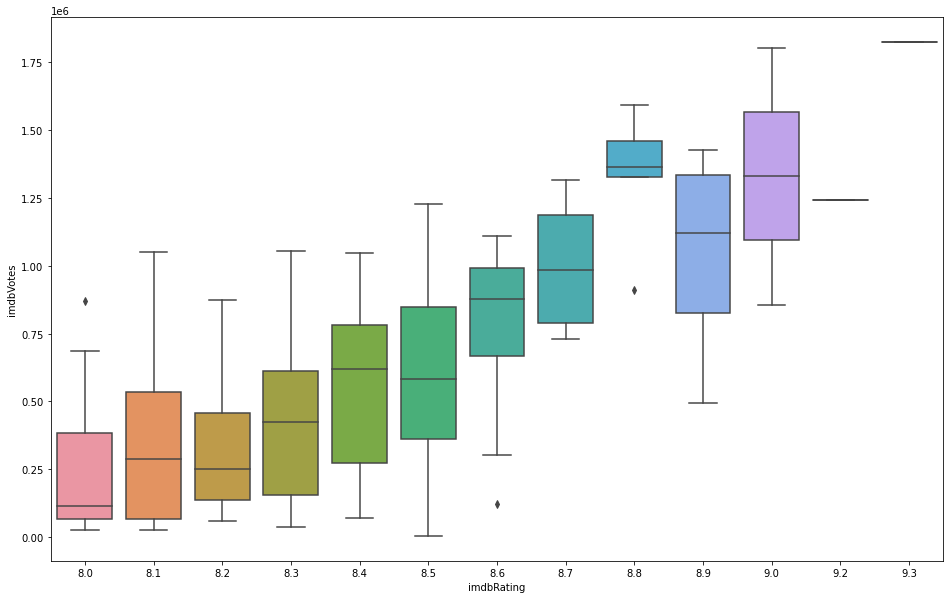

In [23]:
plt.figure(figsize=(16,10))
sns.boxplot(x="imdbRating",y="imdbVotes",data=df1)

<AxesSubplot:xlabel='imdbRating', ylabel='Metascore'>

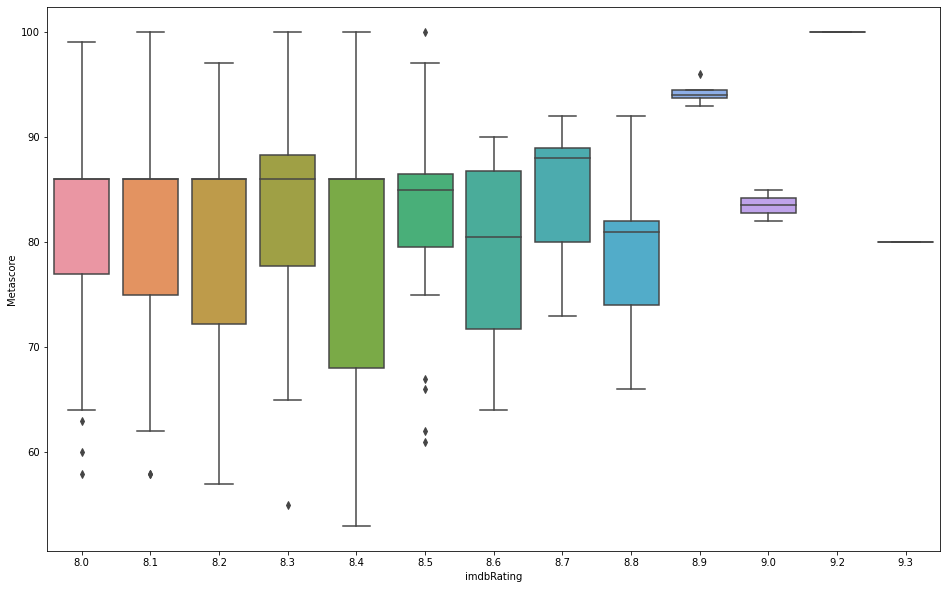

In [24]:
plt.figure(figsize=(16,10))
sns.boxplot(x="imdbRating",y="Metascore",data=df1)

In [25]:
# Interquartile_Range_(IQR)

In [26]:
cols = ['imdbVotes','imdbRating','Metascore','Genre']
Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1
df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-26-b4db669f6eb0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-26-b4db669f6eb0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [27]:
df2.head()

,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
13,14,The Lord of the Rings: The Two Towers,2002,18-Dec-02,179,"[Adventure, Drama, Fantasy]",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","[Bruce Allpress, Sean Astin, John Bach, Sal...",While Frodo and Sam edge closer to Mordor with...,...,Won 2 Oscars. Another 118 wins & 138 nominations.,88.0,8.7,1188300,tt0167261,movie,26-Aug-03,"$339,700,000",New Line Cinema,http://www.lordoftherings.net/
14,15,One Flew Over the Cuckoo's Nest,1975,19-Nov-75,133,[Drama],Milos Forman,"Lawrence Hauben (screenplay), Bo Goldman (scre...","[Michael Berryman, Peter Brocco, Dean R. Bro...",A criminal pleads insanity after getting into ...,...,Won 5 Oscars. Another 30 wins & 13 nominations.,80.0,8.7,729653,tt0073486,movie,09-Dec-97,"$1,498,177",United Artists,NaN
15,16,Goodfellas,1990,21-Sep-90,146,"[Crime, Drama]",Martin Scorsese,"Nicholas Pileggi (book), Nicholas Pileggi (scr...","[Robert De Niro, Ray Liotta, Joe Pesci, Lor...",The story of Henry Hill and his life through t...,...,Won 1 Oscar. Another 37 wins & 35 nominations.,89.0,8.7,787997,tt0099685,movie,26-Mar-97,"$1,498,177",Warner Bros.,NaN
16,17,The Matrix,1999,31-Mar-99,136,"[Action, Sci-Fi]","Lana Wachowski, Lilly Wachowski","Lilly Wachowski, Lana Wachowski","[Keanu Reeves, Laurence Fishburne, Carrie-An...",A computer hacker learns from mysterious rebel...,...,Won 4 Oscars. Another 34 wins & 45 nominations.,73.0,8.7,1314628,tt0133093,movie,21-Sep-99,"$1,498,177",Warner Bros. Pictures,http://www.whatisthematrix.com
17,18,Star Wars: Episode IV - A New Hope,1977,25-May-77,121,"[Action, Adventure, Fantasy]",George Lucas,George Lucas,"[Mark Hamill, Harrison Ford, Carrie Fisher, ...",Luke Skywalker joins forces with a Jedi Knight...,...,Won 6 Oscars. Another 50 wins & 28 nominations.,92.0,8.7,982688,tt0076759,movie,21-Sep-04,"$1,498,177",20th Century Fox,http://www.starwars.com/episode-iv/


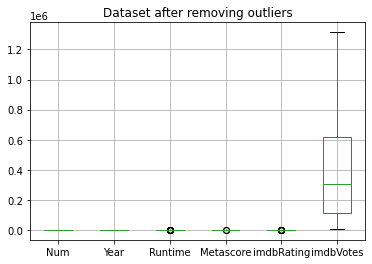

In [28]:
plt.title("Dataset after removing outliers")
df2.boxplot()
plt.show()

<AxesSubplot:xlabel='imdbRating', ylabel='imdbVotes'>

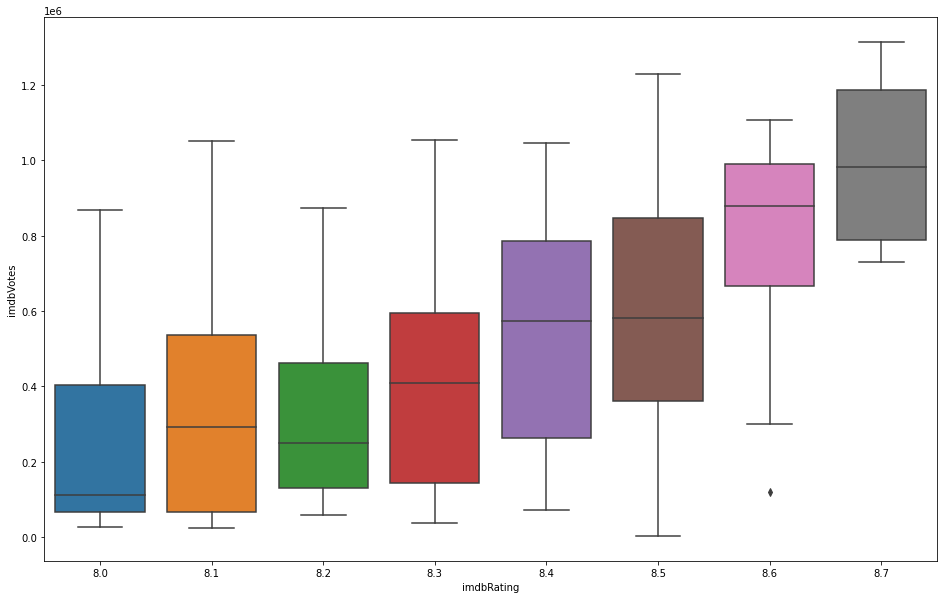

In [29]:
plt.figure(figsize=(16,10))
sns.boxplot(x="imdbRating",y="imdbVotes",data=df2)

<AxesSubplot:xlabel='imdbRating', ylabel='Metascore'>

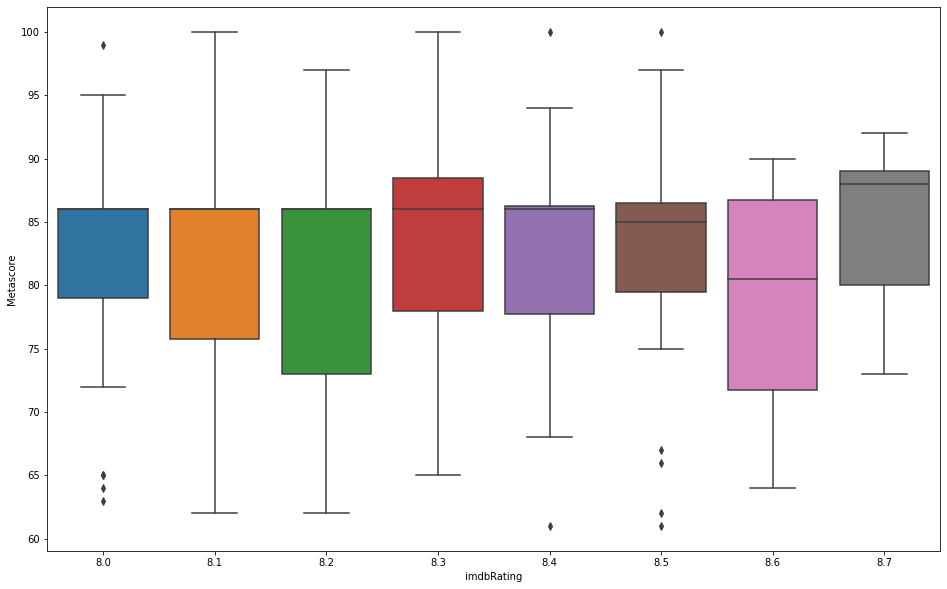

In [30]:
plt.figure(figsize=(16,10))
sns.boxplot(x="imdbRating",y="Metascore",data=df2)

In [31]:
df2["imdbRating"].value_counts()

8.1    68
8.0    49
8.2    33
8.3    31
8.5    24
8.4    12
8.6     8
8.7     5
Name: imdbRating, dtype: int64

<AxesSubplot:xlabel='imdbRating', ylabel='count'>

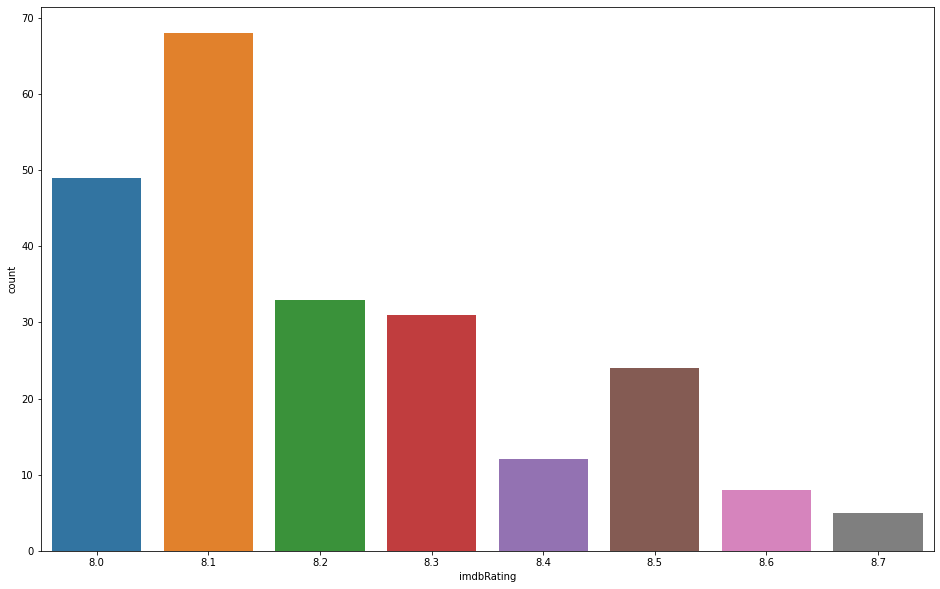

In [32]:
plt.figure(figsize=(16,10))
sns.countplot(x="imdbRating",data=df2)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdbRating', ylabel='Density'>

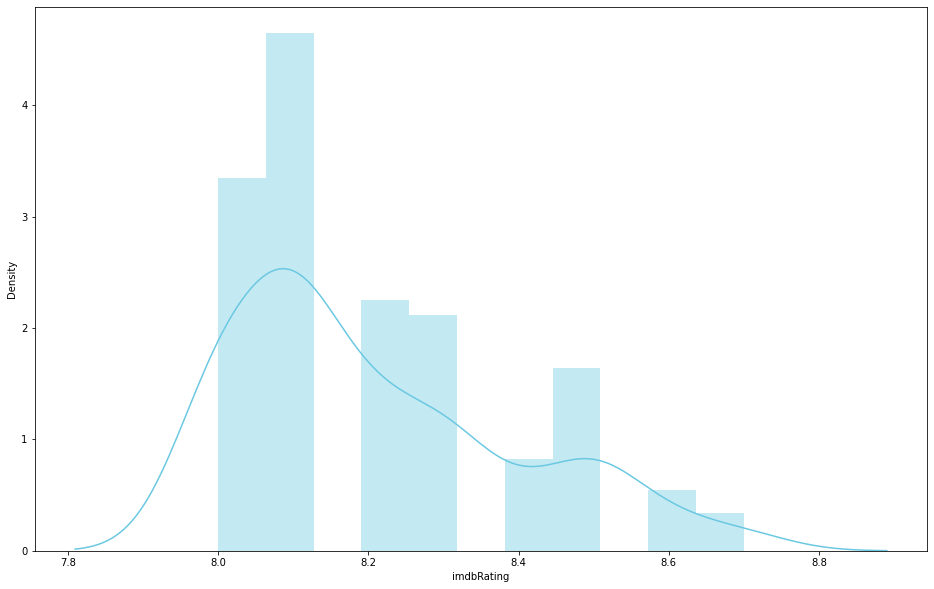

In [33]:
plt.figure(figsize=(16,10))
sns.distplot(df2["imdbRating"],color="#6ac8e1")

<AxesSubplot:xlabel='imdbRating', ylabel='Count'>

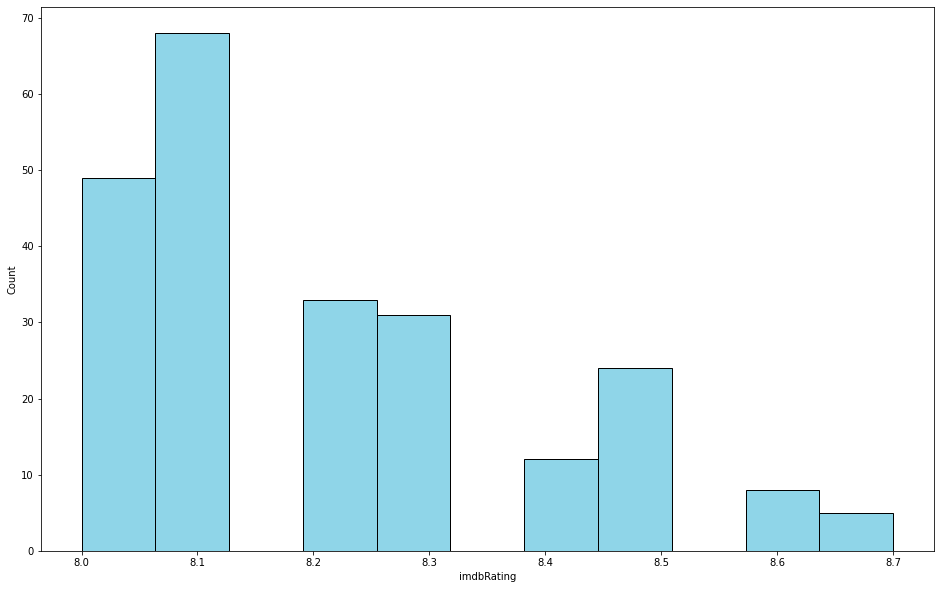

In [34]:
plt.figure(figsize=(16,10))
sns.histplot(x="imdbRating",data=df2,color="#6ac8e1")

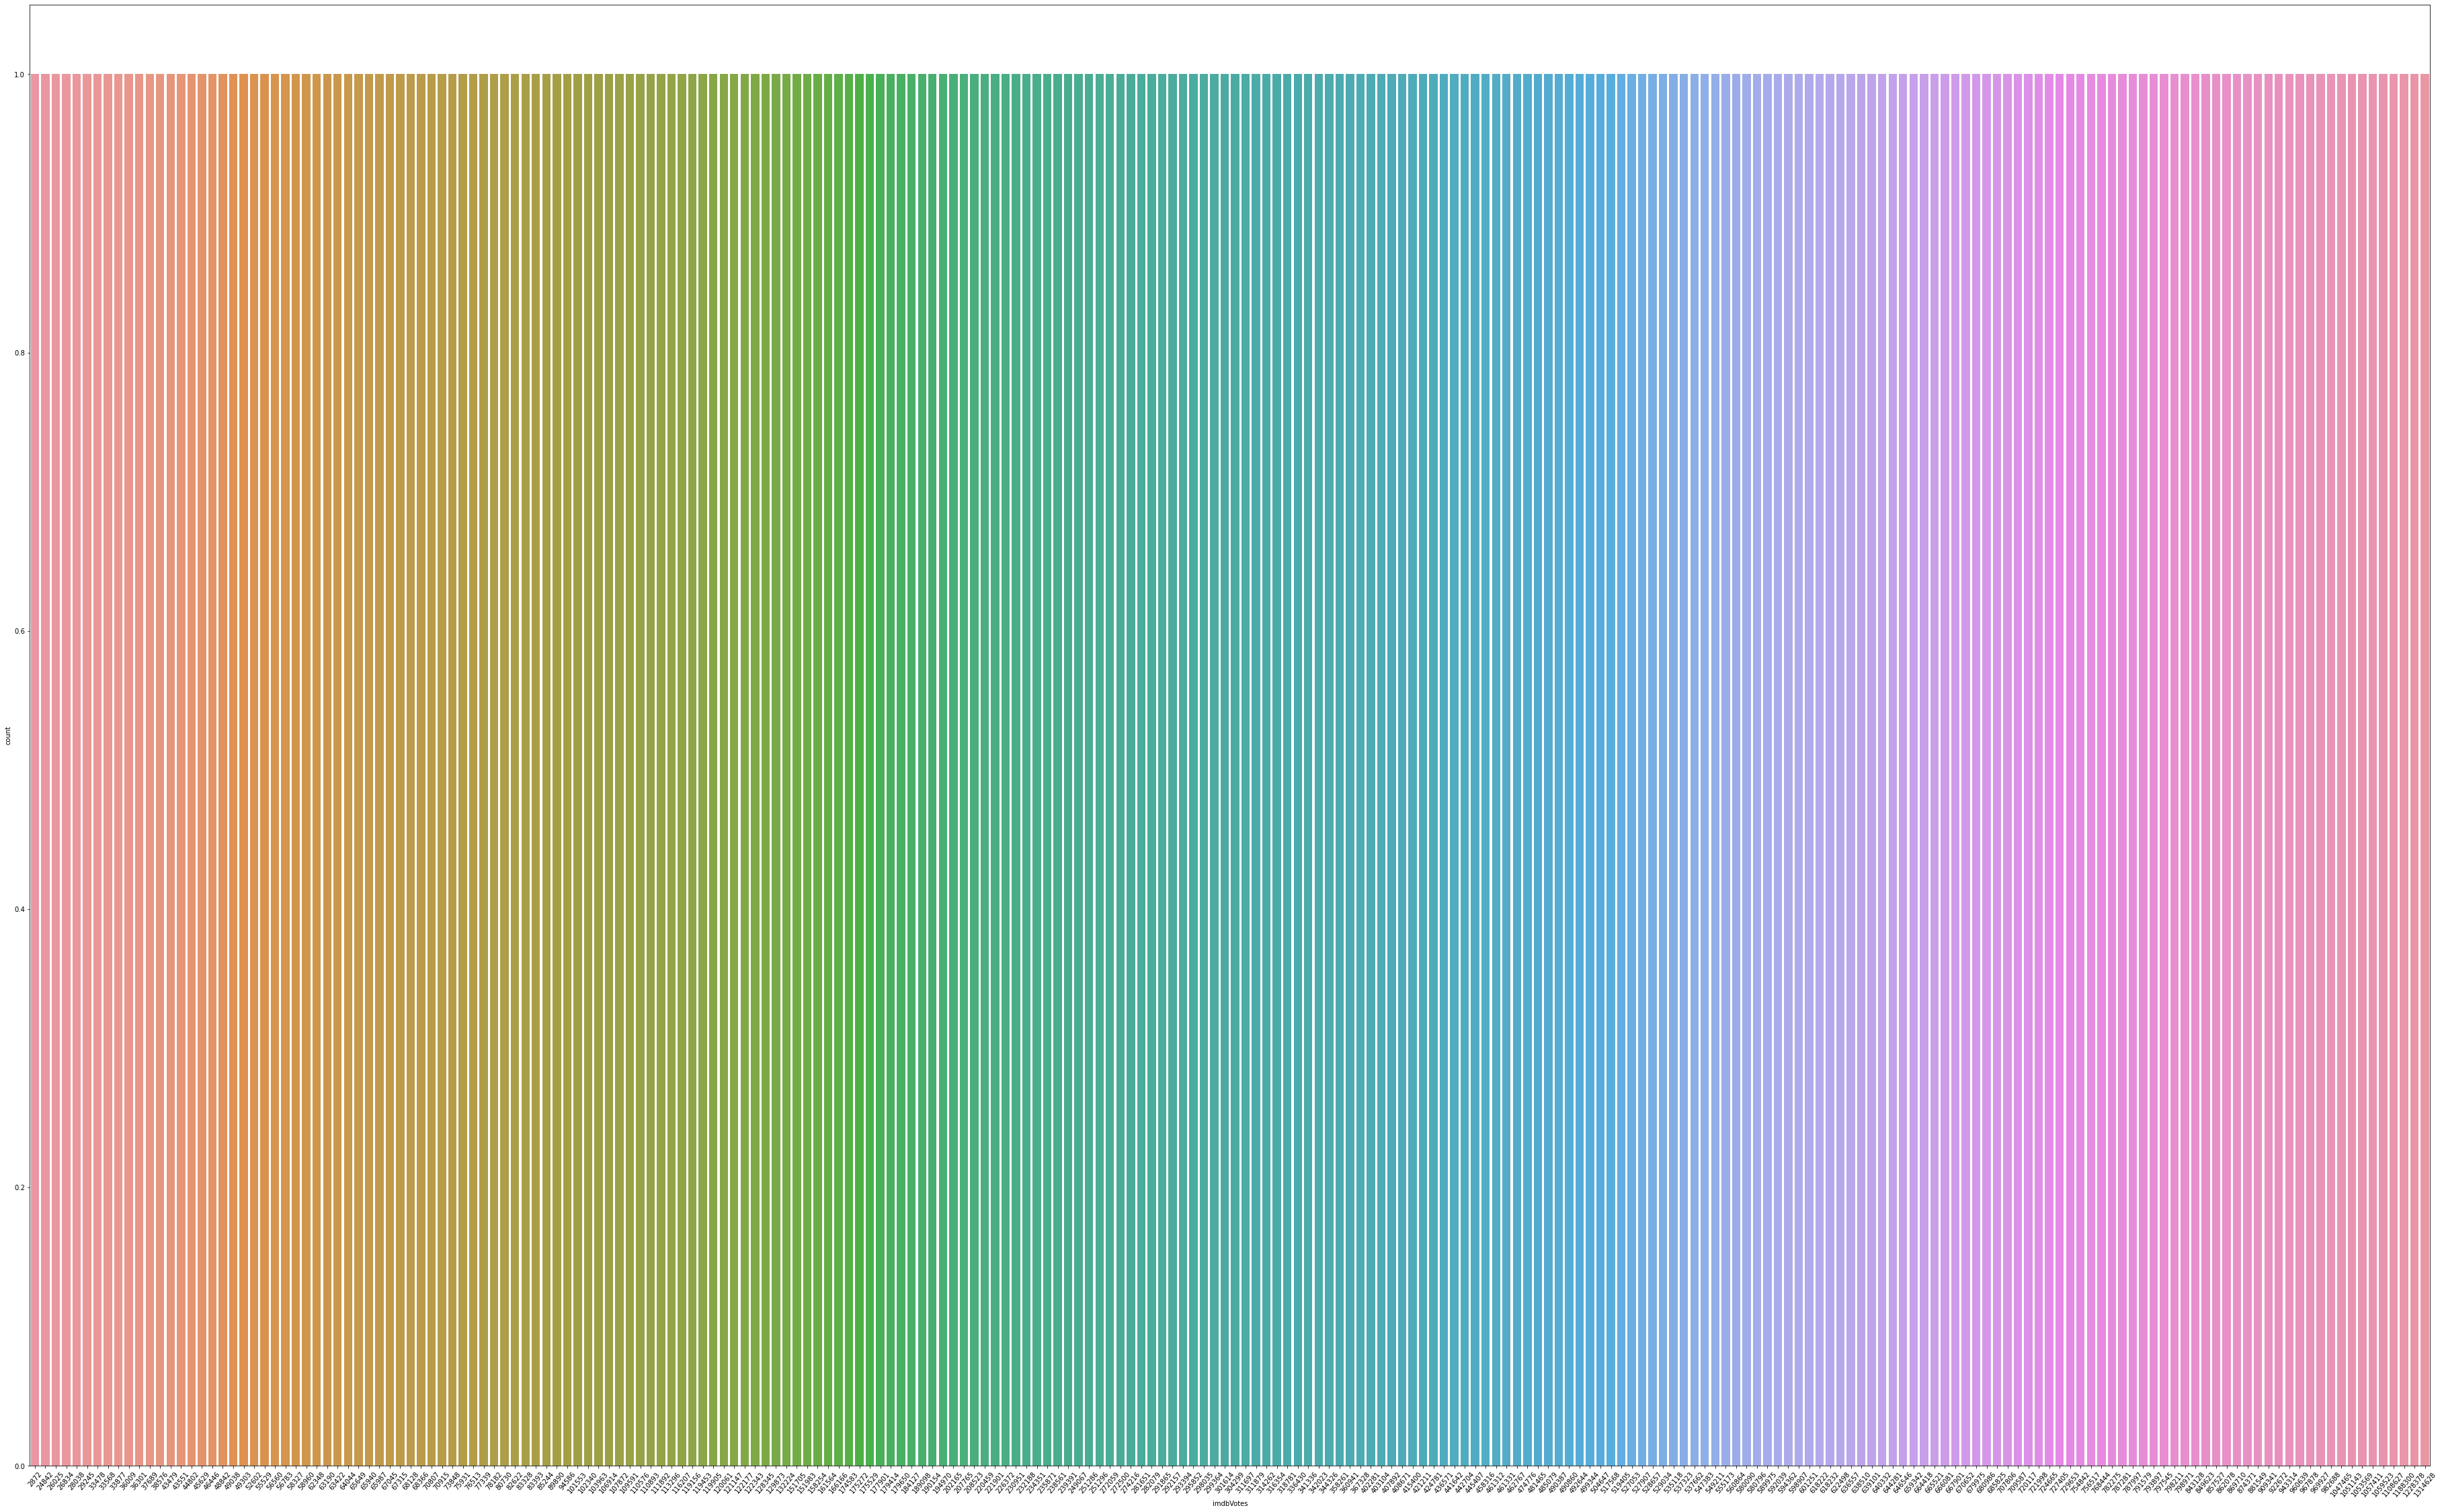

In [35]:
plt.figure(figsize=(64,40))
sns.countplot(x ='imdbVotes', data = df2)
plt.xticks(rotation = 50)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdbVotes', ylabel='Density'>

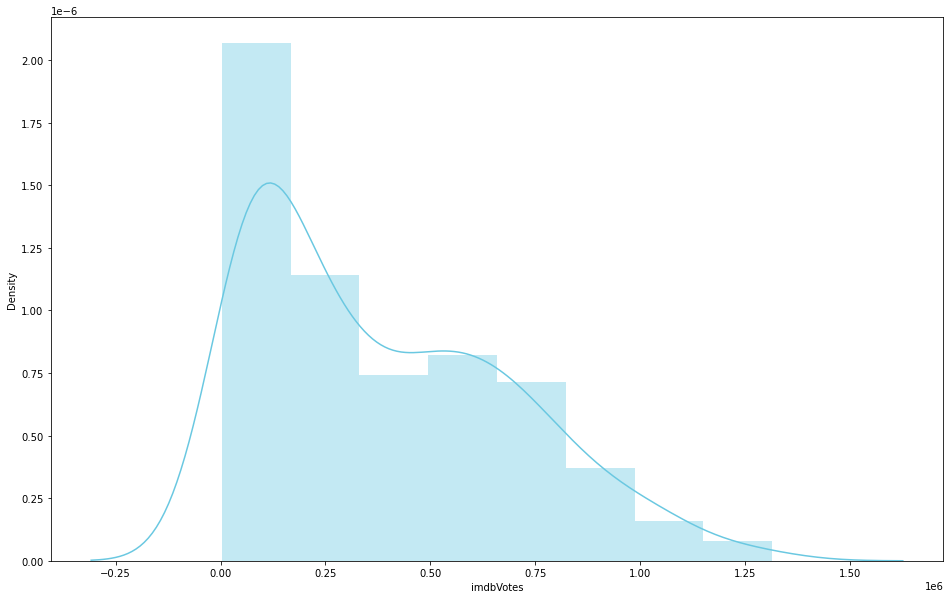

In [36]:
plt.figure(figsize=(16,10))
sns.distplot(df2["imdbVotes"],color="#6ac8e1")

<AxesSubplot:xlabel='imdbVotes', ylabel='Count'>

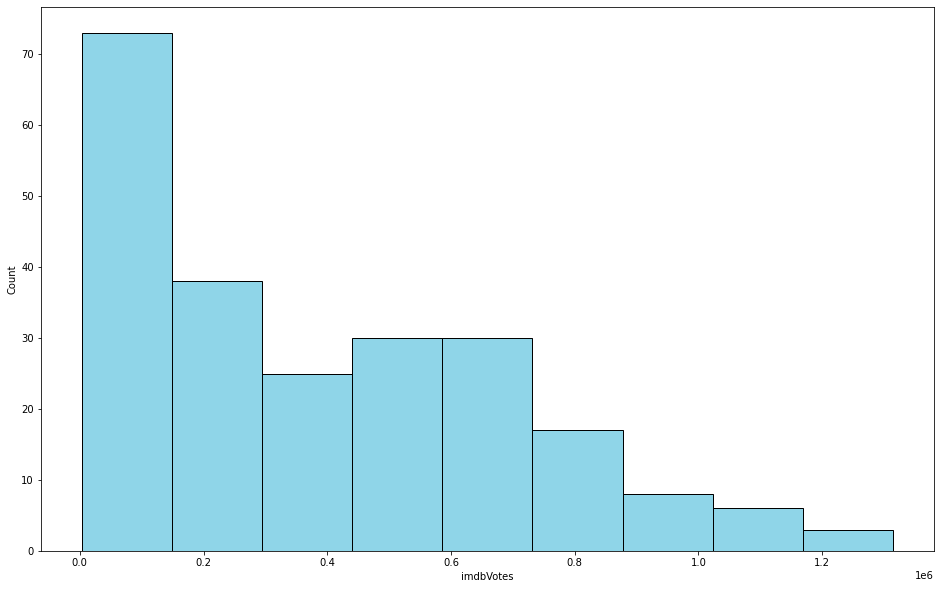

In [37]:
plt.figure(figsize=(16,10))
sns.histplot(x="imdbVotes",data=df2,color="#6ac8e1")

<AxesSubplot:xlabel='Metascore', ylabel='count'>

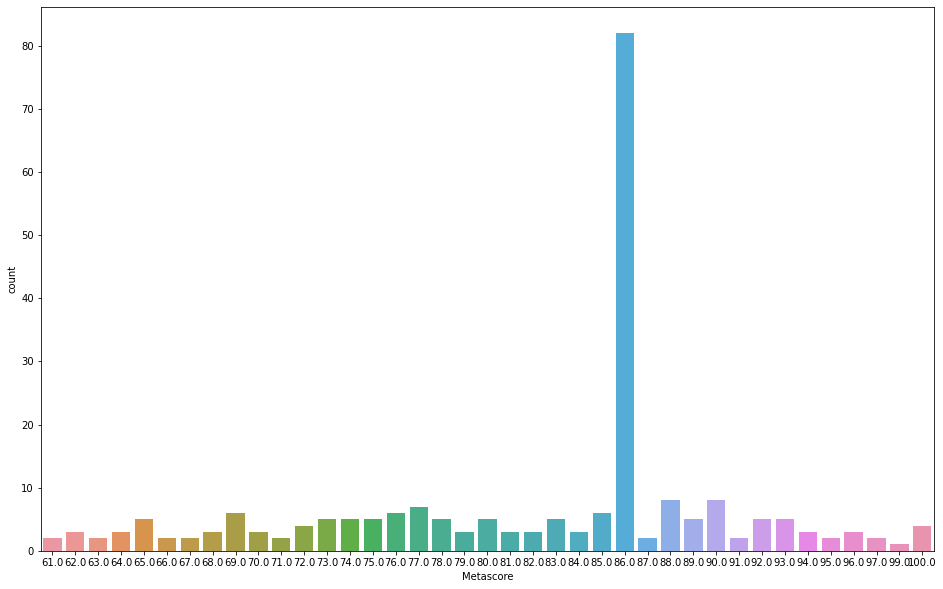

In [38]:
plt.figure(figsize=(16,10))
sns.countplot(x ='Metascore', data = df2)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Metascore', ylabel='Density'>

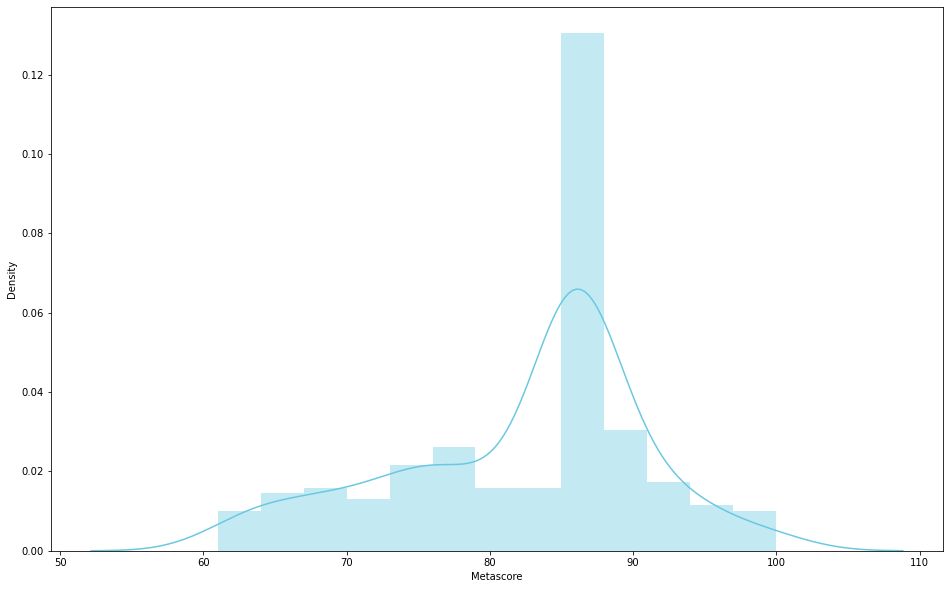

In [39]:
plt.figure(figsize=(16,10))
sns.distplot(df2["Metascore"],color="#6ac8e1")

<AxesSubplot:xlabel='Metascore', ylabel='Count'>

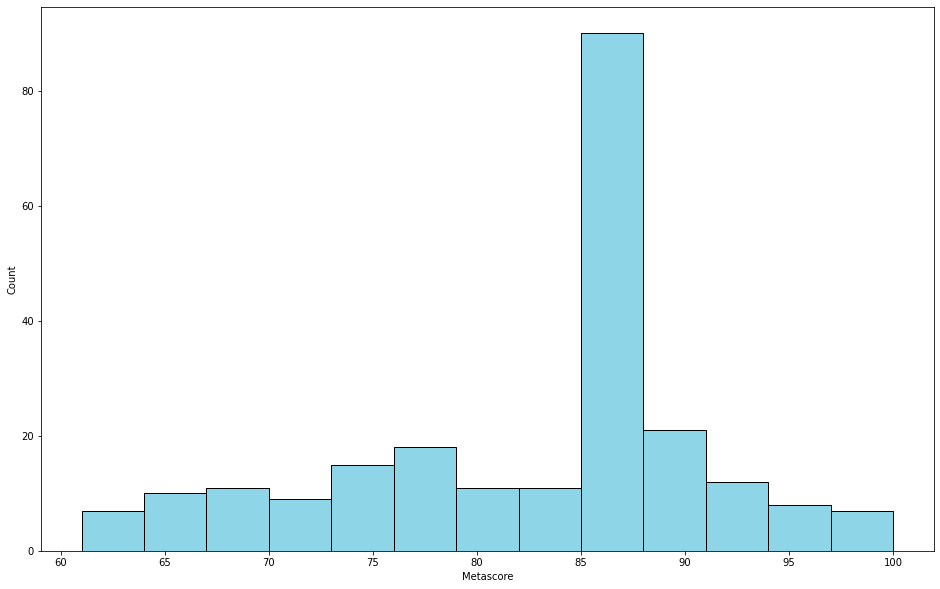

In [40]:
plt.figure(figsize=(16,10))
sns.histplot(x="Metascore",data=df2,color="#6ac8e1")

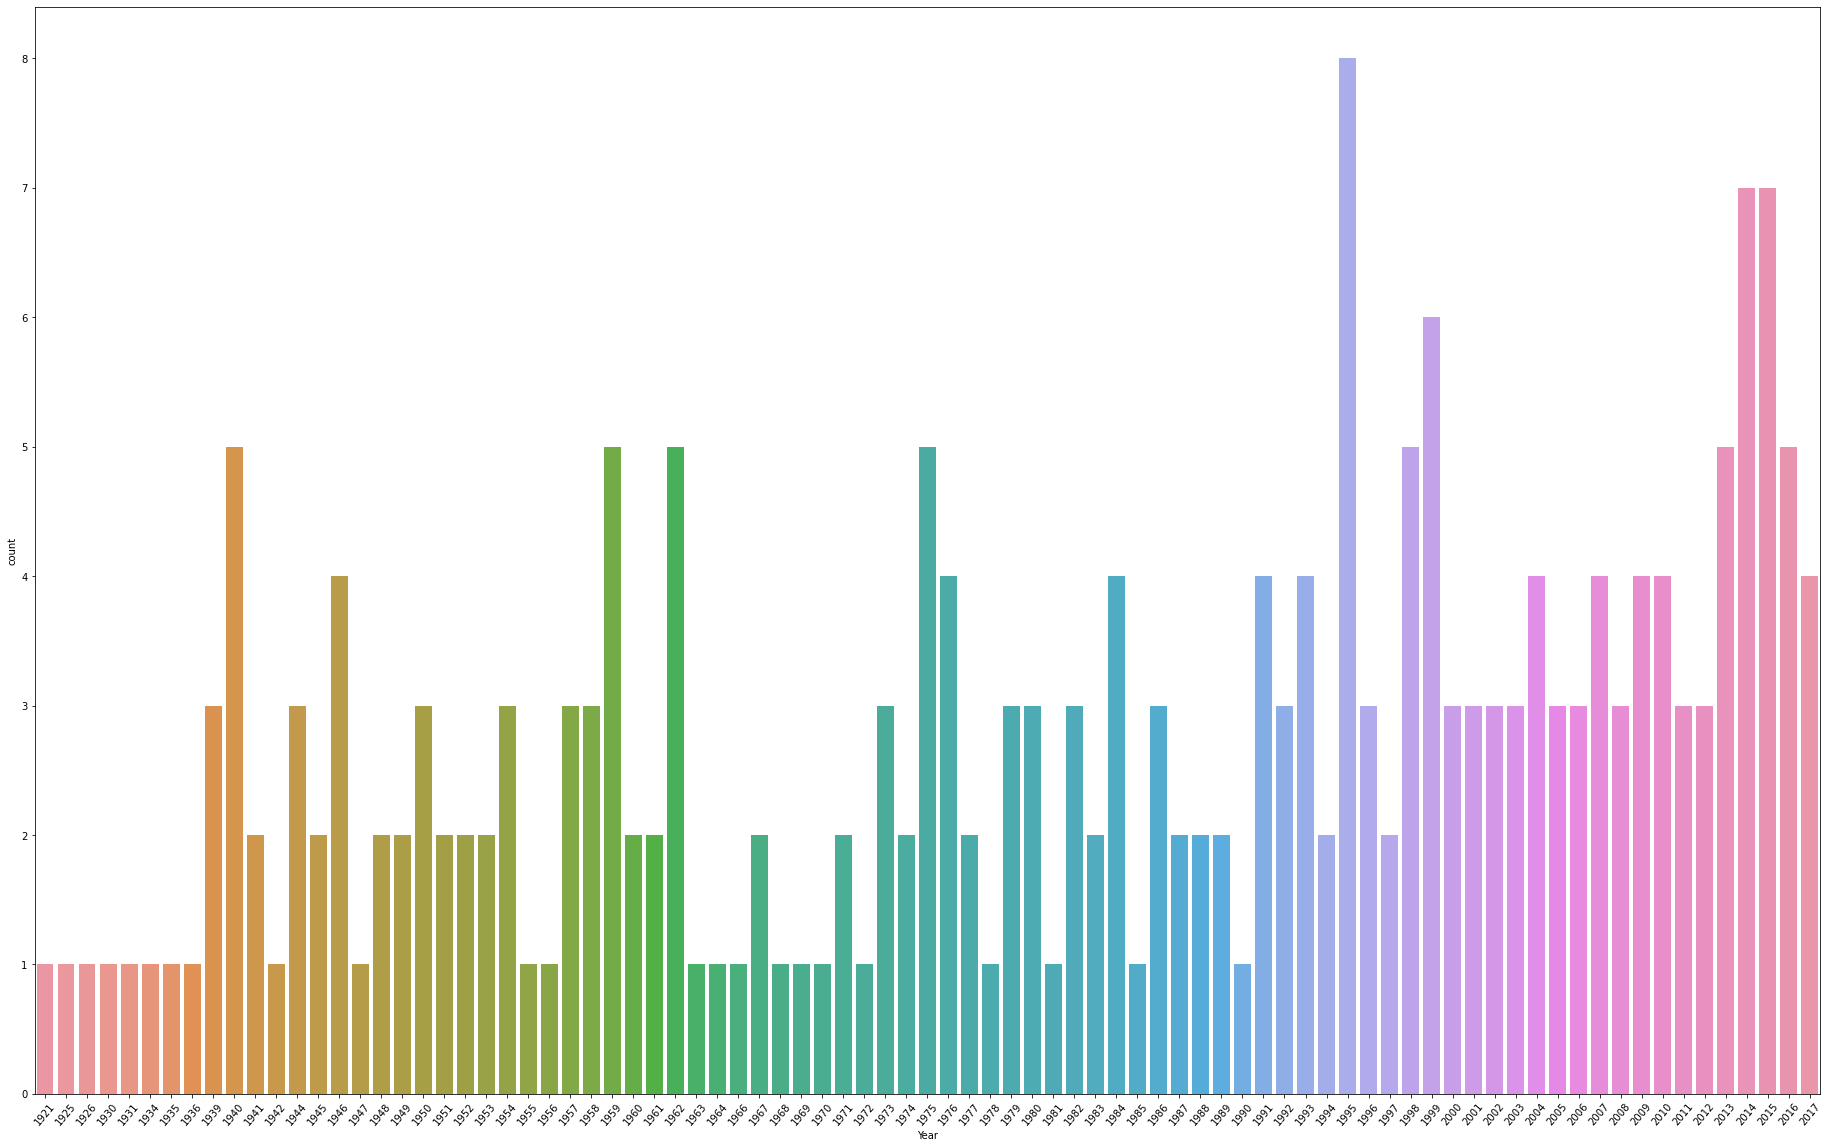

In [41]:
plt.figure(figsize=(32,20))
sns.countplot(x ='Year', data = df2)
plt.xticks(rotation = 50)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

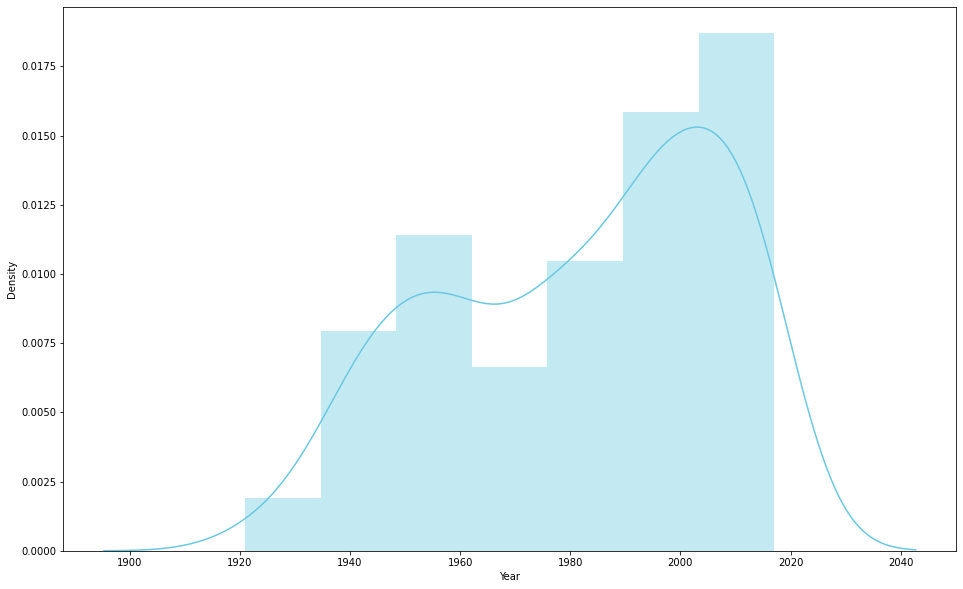

In [42]:
plt.figure(figsize=(16,10))
sns.distplot(df2["Year"],color="#6ac8e1")

<AxesSubplot:xlabel='Year', ylabel='Count'>

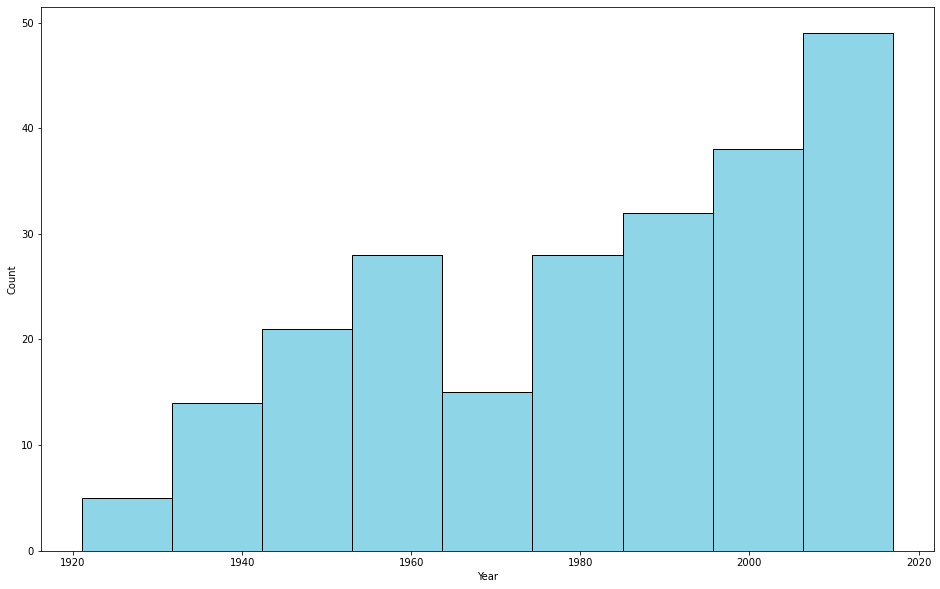

In [43]:
plt.figure(figsize=(16,10))
sns.histplot(x="Year",data=df2,color="#6ac8e1")

In [44]:
df2.corr()

,Num,Year,Runtime,Metascore,imdbRating,imdbVotes
Num,1.000000,-0.001589,-0.132604,-0.030223,-0.936358,-0.448131
Year,-0.001589,1.000000,0.157521,-0.426688,0.007274,0.598109
Runtime,-0.132604,0.157521,1.000000,-0.155094,0.135041,0.168113
Metascore,-0.030223,-0.426688,-0.155094,1.000000,0.006558,-0.397061
imdbRating,-0.936358,0.007274,0.135041,0.006558,1.000000,0.485296
imdbVotes,-0.448131,0.598109,0.168113,-0.397061,0.485296,1.000000


In [45]:
ohe=OneHotEncoder(sparse=False)

In [46]:
df2["Country"] = ohe.fit_transform(df2[["Country"]])
df2["Language"] = ohe.fit_transform(df2[["Language"]])

<ipython-input-46-60a790c6a554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Country"] = ohe.fit_transform(df2[["Country"]])
<ipython-input-46-60a790c6a554>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Language"] = ohe.fit_transform(df2[["Language"]])


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 13 to 249
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Num         230 non-null    int64  
 1   Title       230 non-null    object 
 2   Year        230 non-null    int64  
 3   Released    230 non-null    object 
 4   Runtime     230 non-null    int32  
 5   Genre       230 non-null    object 
 6   Director    230 non-null    object 
 7   Writer      230 non-null    object 
 8   Actors      230 non-null    object 
 9   Plot        230 non-null    object 
 10  Language    230 non-null    float64
 11  Country     230 non-null    float64
 12  Awards      230 non-null    object 
 13  Metascore   230 non-null    float64
 14  imdbRating  230 non-null    float64
 15  imdbVotes   230 non-null    int32  
 16  imdbID      230 non-null    object 
 17  Type        230 non-null    object 
 18  DVD         230 non-null    object 
 19  BoxOffice   230 non-null    

In [48]:
df4=df2[["Num","Year","Language","Country","Metascore","imdbRating","imdbVotes"]]
df4

,Num,Year,Language,Country,Metascore,imdbRating,imdbVotes
13,14,2002,0.0,0.0,88.0,8.7,1188300
14,15,1975,1.0,0.0,80.0,8.7,729653
15,16,1990,0.0,0.0,89.0,8.7,787997
16,17,1999,1.0,0.0,73.0,8.7,1314628
17,18,1977,1.0,0.0,92.0,8.7,982688
...,...,...,...,...,...,...,...
245,246,1945,1.0,0.0,86.0,8.0,26834
246,247,2013,1.0,0.0,82.0,8.0,62348
247,248,1940,0.0,0.0,86.0,8.0,43551
248,249,1999,1.0,0.0,86.0,8.0,67045


In [49]:
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
df5=pd.DataFrame(robust_scaler.fit_transform(df4))
df5.head()

,0,1,2,3,4,5,6
0,-0.991561,0.346369,-1.0,0.0,0.205128,3.0,1.741458
1,-0.983122,-0.256983,0.0,0.0,-0.615385,3.0,0.839306
2,-0.974684,0.078212,-1.0,0.0,0.307692,3.0,0.954067
3,-0.966245,0.279330,0.0,0.0,-1.333333,3.0,1.989943
4,-0.957806,-0.212291,0.0,0.0,0.615385,3.0,1.337022


In [50]:
# Visualizing no. of flims released in different years

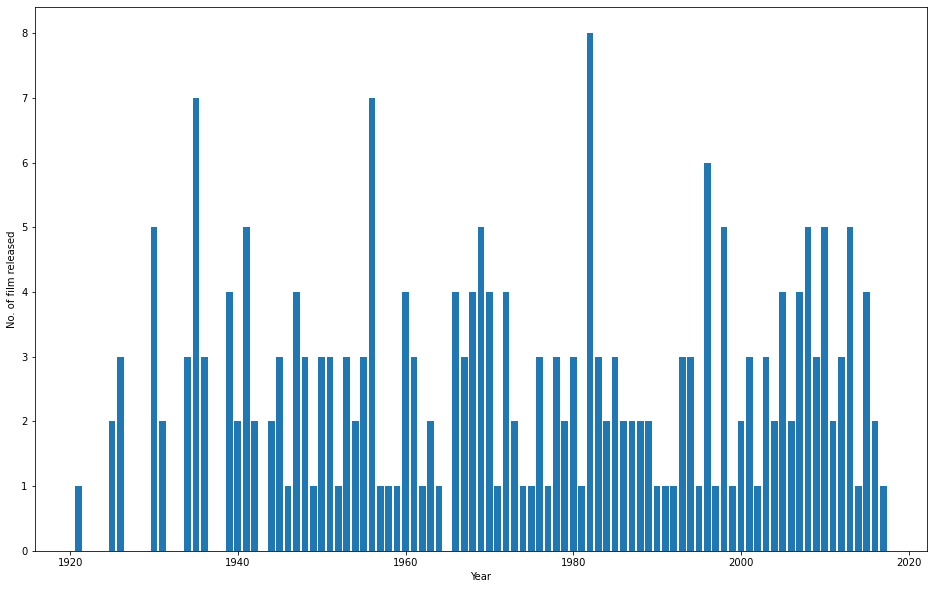

In [51]:
film_releases = df4.groupby('Year')['Year'].agg('count')
year = df4['Year'].unique()
plt.figure(figsize=(16,10))
plt.bar(year,film_releases)
plt.xlabel("Year")
plt.ylabel("No. of film released")
plt.show()

In [52]:
# Percent of null data in original dataset

In [53]:
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage

Num            0.0
Title          0.0
Year           0.0
Released       0.8
Runtime        0.0
Genre          0.0
Director       0.0
Writer         0.4
Actors         0.0
Plot           0.0
Language       0.0
Country        0.0
Awards         2.0
Metascore     29.2
imdbRating     0.0
imdbVotes      0.0
imdbID         0.0
Type           0.0
DVD            1.2
BoxOffice     70.0
Production     0.0
Website       47.6
dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

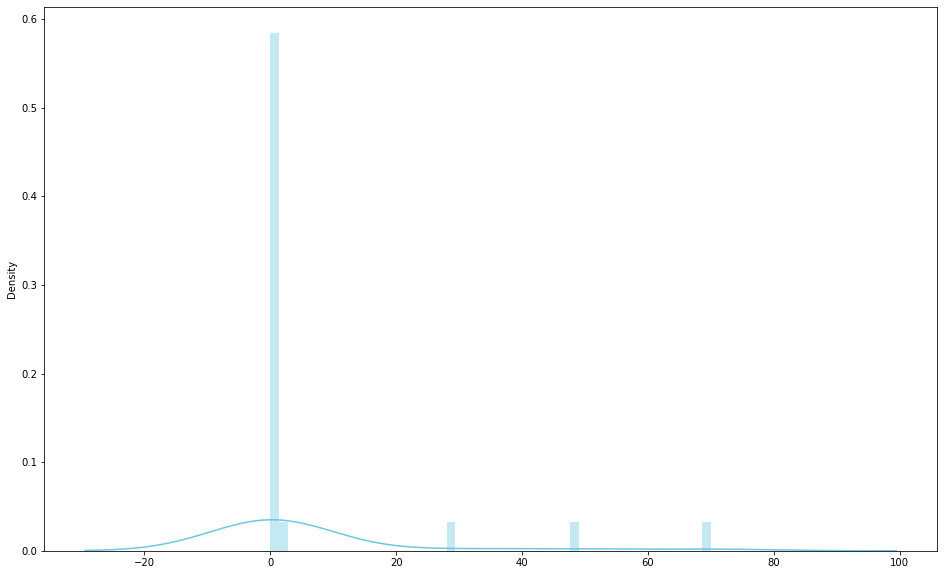

In [54]:
plt.figure(figsize=(16,10))
sns.distplot(null_percentage,color="#6ac8e1")

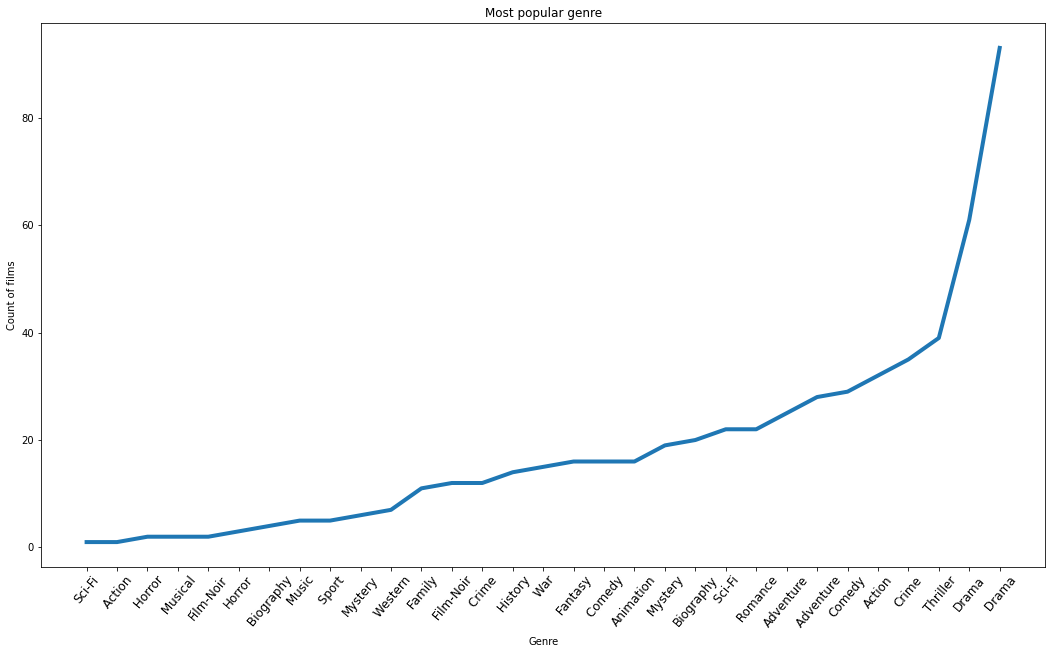

In [55]:
genre = {}
for i in df2['Genre'].values:
    for u in i:
        genre.setdefault(u, 0)
        genre[u]+=1

genre = dict(sorted(genre.items(), key=lambda item: item[1]))

plt.figure(figsize=(18, 10))
plt.plot([i for i in genre], [genre[i] for i in genre], linewidth=4.0)
 
plt.title("Most popular genre")
plt.ylabel('Count of films')
plt.xlabel("Genre")
plt.xticks(rotation=50, fontsize=12)

plt.show()

In [56]:
#displaying movie above 2hrs

In [57]:
df2[df2['Runtime'] >= 180]['Title']

29                  The Green Mile
54     Once Upon a Time in America
64              Lawrence of Arabia
93           Judgment at Nuremberg
115        The Wolf of Wall Street
118             Gone with the Wind
122                The Deer Hunter
146                        Ben-Hur
172                         Gandhi
173                   Barry Lyndon
232                            JFK
235                       Magnolia
Name: Title, dtype: object

In [58]:
# Votes per year

In [59]:
df4.groupby('Year')['imdbVotes'].mean().sort_values(ascending = False)

Year
2012    1.108995e+06
2005    8.630057e+05
2000    8.623653e+05
2003    8.059353e+05
1985    7.982110e+05
            ...     
1930    4.903800e+04
1972    3.857600e+04
1945    2.743600e+04
1935    2.602500e+04
1947    2.484200e+04
Name: imdbVotes, Length: 85, dtype: float64

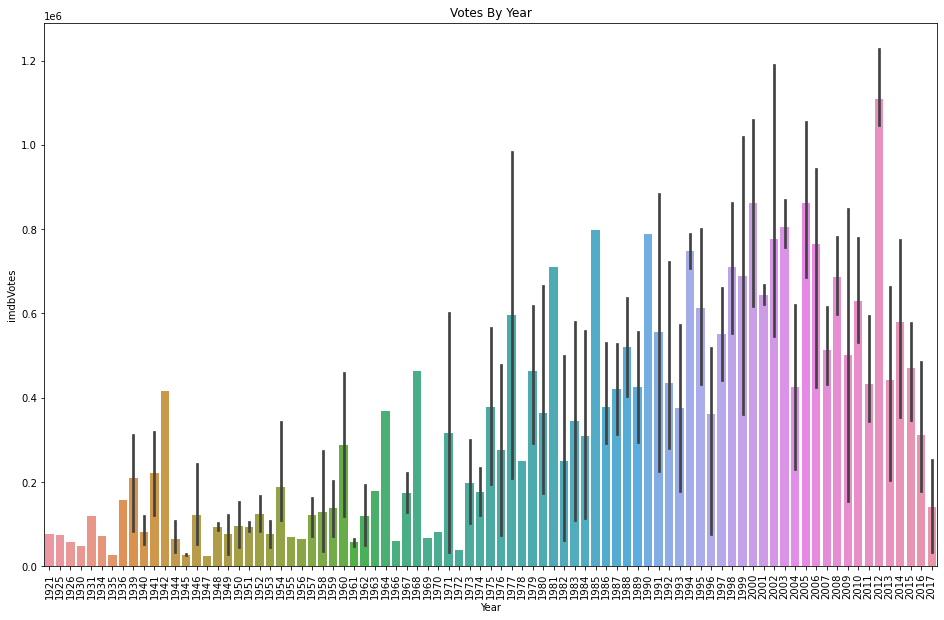

In [60]:
plt.figure(figsize=(16,10))
sns.barplot(x='Year', y='imdbVotes', data = df2)
plt.xticks(rotation = 90)
plt.title("Votes By Year")
plt.show()

In [61]:
# find the average rating of Directors

In [62]:
df2.groupby('Director')['imdbRating'].mean().sort_values(ascending = False)

Director
Lana Wachowski, Lilly Wachowski                      8.7
George Lucas                                         8.7
Peter Jackson                                        8.7
Jonathan Demme                                       8.6
Luc Besson                                           8.6
                                                    ... 
Sam Peckinpah                                        8.0
Frank Miller, Robert Rodriguez, Quentin Tarantino    8.0
Henry Selick                                         8.0
Howard Hawks                                         8.0
Henry Koster                                         8.0
Name: imdbRating, Length: 149, dtype: float64

In [63]:
# top fav movie

In [64]:
top10votes = df2.nlargest(10, 'imdbVotes')[['Title','imdbVotes']].set_index('Title')
top10votes

,imdbVotes
Title,
The Matrix,1314628
The Dark Knight Rises,1228378
The Lord of the Rings: The Two Towers,1188300
Se7en,1108627
Gladiator,1059523
Interstellar,1057411
Batman Begins,1053569
The Avengers,1051143
Django Unchained,1047465


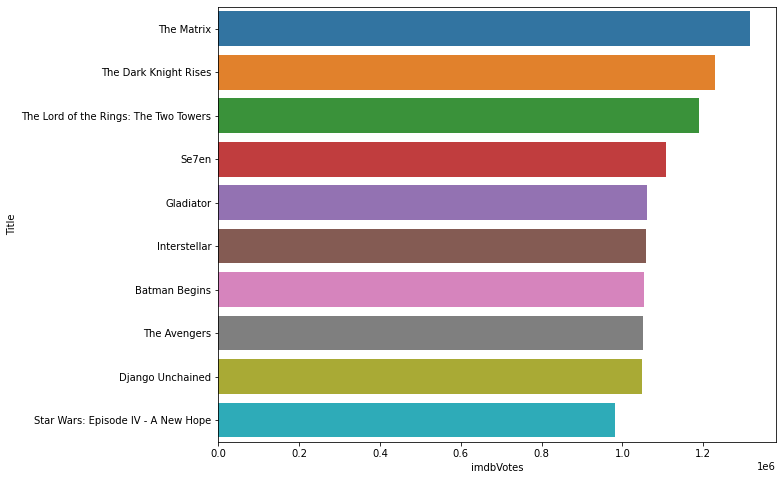

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'imdbVotes', y = top10votes.index, data = top10votes)

plt.show()

In [66]:
# most popular genre

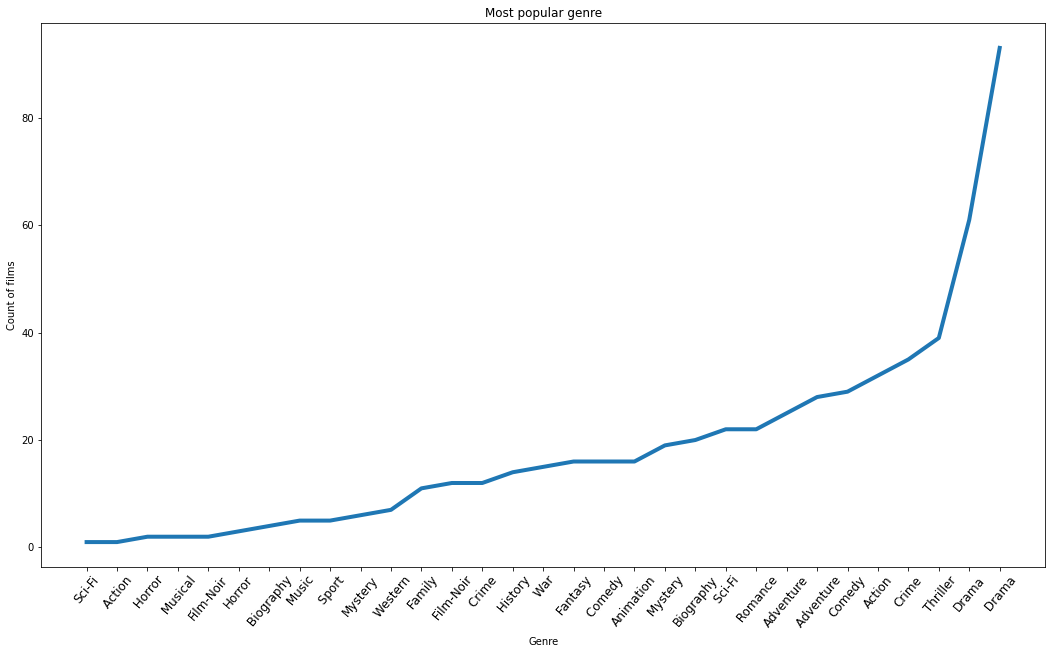

In [67]:
genre = {}
for i in df2['Genre'].values:
    for u in i:
        genre.setdefault(u, 0)
        genre[u]+=1

genre = dict(sorted(genre.items(), key=lambda item: item[1]))

plt.figure(figsize=(18, 10))
plt.plot([i for i in genre], [genre[i] for i in genre], linewidth=4.0)
 
plt.title("Most popular genre")
plt.ylabel('Count of films')
plt.xlabel("Genre")
plt.xticks(rotation=50, fontsize=12)

plt.show()

In [68]:
# famous actor

In [69]:
df["Actors"].unique()

array(['Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
       'Marlon Brando, Al Pacino, James Caan, Richard S. Castellano',
       'Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro',
       'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
       'Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall',
       'Liam Neeson, Ben Kingsley, Ralph Fiennes, Caroline Goodall',
       'Noel Appleby, Ali Astin, Sean Astin, David Aston',
       'Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta',
       'Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier',
       'Alan Howard, Noel Appleby, Sean Astin, Sala Baker',
       'Tom Hanks, Rebecca Williams, Sally Field, Michael Conner Humphreys',
       'Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams',
       'Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Tom Hardy',
       'Bruce Allpress, Sean Astin, John Bach, Sala Baker',
       'Michael Berryman, Peter Brocco, Dean R. Brooks, Alonzo Brown

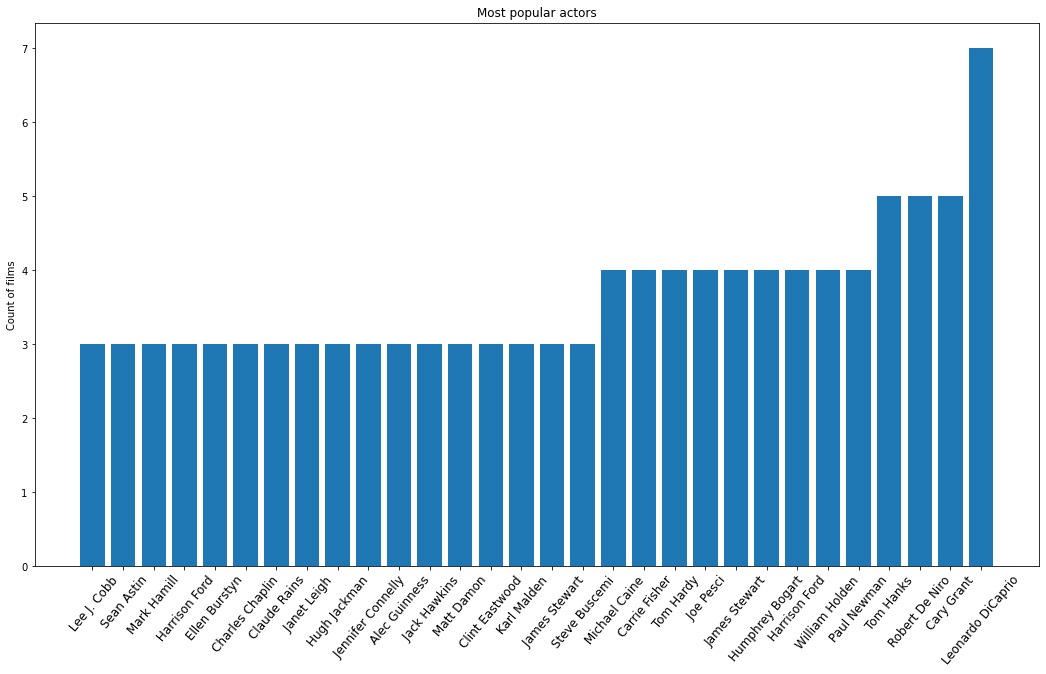

In [70]:
actors = {}
for i in df1['Actors'].values:
    for u in i:
        actors.setdefault(u, 0)
        actors[u]+=1

actors = dict(sorted(actors.items(), key=lambda item: item[1])[-30:])

plt.figure(figsize=(18, 10))
plt.bar([i for i in actors], [actors[i] for i in actors])
 
plt.title("Most popular actors")
 
plt.ylabel('Count of films')

plt.xticks(rotation=50, fontsize=12)

plt.show()

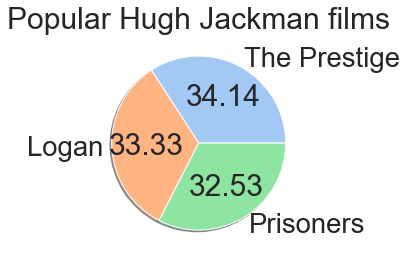

In [71]:
actor = {};
for i in df1[['Title','Actors', 'imdbRating']].values:
    if 'Hugh Jackman' in i[1]: 
        actor[i[0]] = i[2]

sns.set_theme(palette="pastel", font="arial", font_scale= 2.5)

plt.pie([actor[i] for i in actor], labels=[i for i in actor], autopct='%.2f',shadow=True)
plt.title("Popular Hugh Jackman films")

plt.rcParams["figure.figsize"] = (20,20)
plt.show()

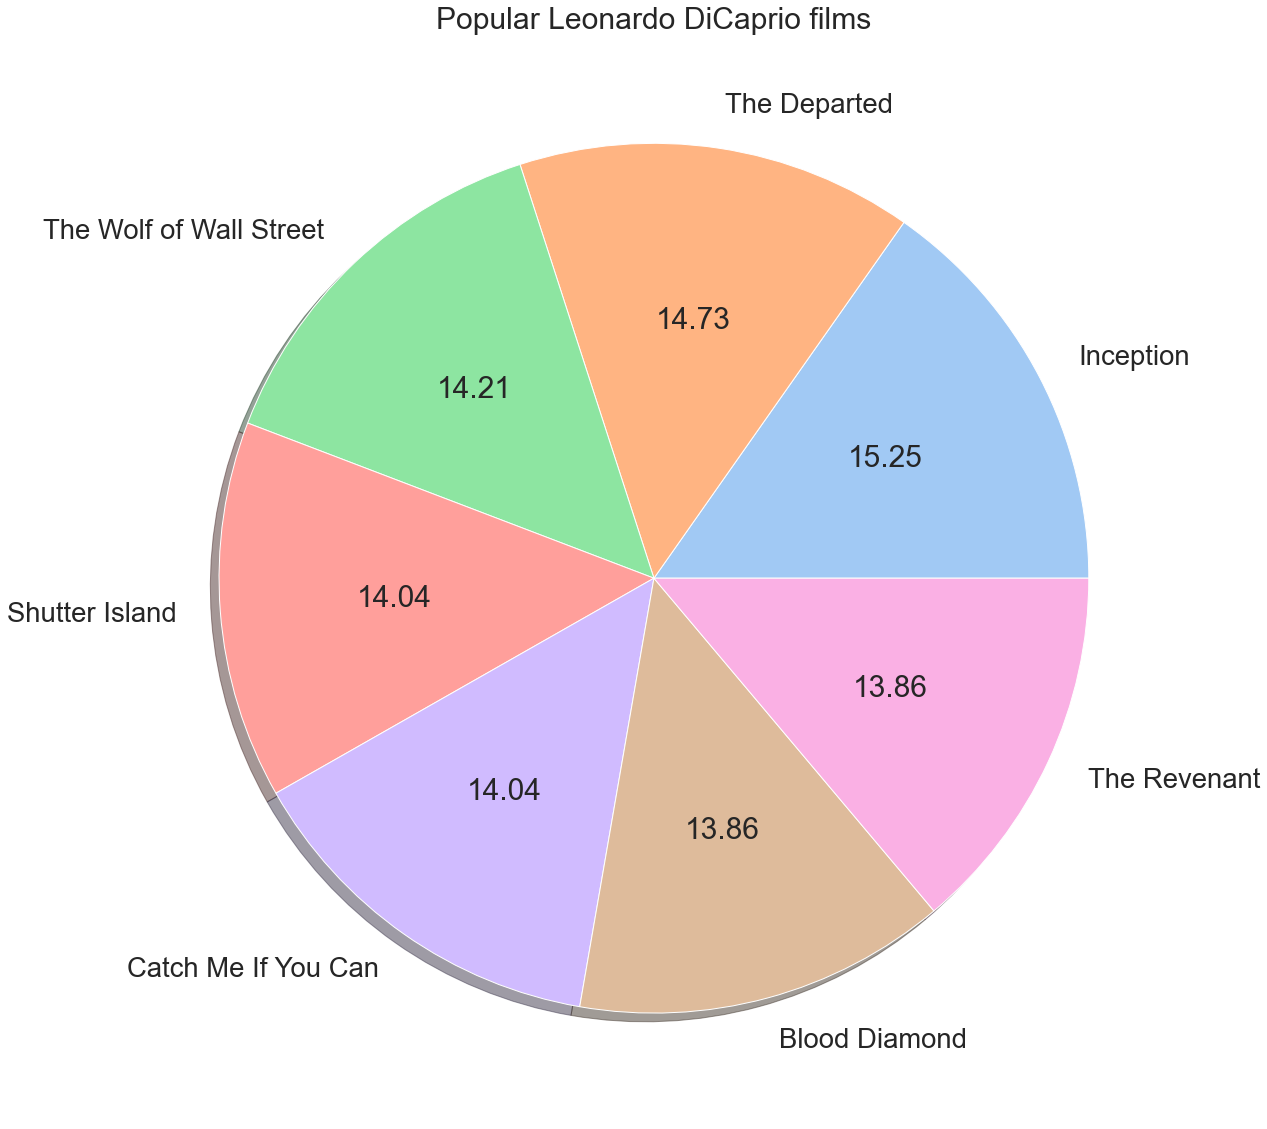

In [72]:
actor = {};
for i in df1[['Title','Actors', 'imdbRating']].values:
    if 'Leonardo DiCaprio' in i[1]: 
        actor[i[0]] = i[2]

sns.set_theme(palette="pastel", font="arial", font_scale= 2.5)

plt.pie([actor[i] for i in actor], labels=[i for i in actor], autopct='%.2f',shadow=True)
plt.title("Popular Leonardo DiCaprio films")

plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [73]:
# popular production

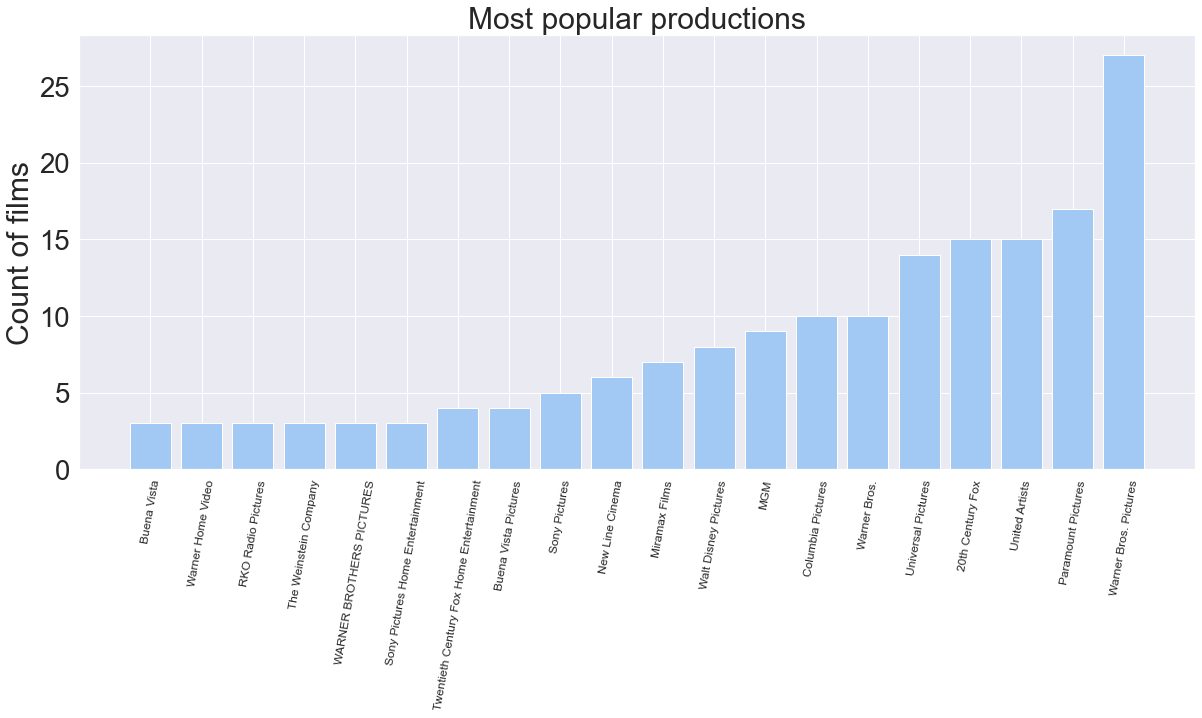

In [74]:
production = {}
for i in df1['Production'].values:
    production.setdefault(i, 0)
    production[i]+=1

production = dict(sorted(production.items(), key=lambda item: item[1])[-20:])

plt.figure(figsize=(20, 8))
plt.bar([i for i in production], [production[i] for i in production])
 
plt.title("Most popular productions")
 
plt.ylabel('Count of films')

plt.xticks(rotation=80, fontsize=12)

plt.show()

In [75]:
# top movies according to metascore

In [76]:
Top = df2[['Title', 'Metascore']].sort_values(by="Metascore",ascending=False)
Top = Top.head(20)
Top.head(10)

,Title,Metascore
64,Lawrence of Arabia,100.0
28,Casablanca,100.0
184,The Wizard of Oz,100.0
56,Citizen Kane,100.0
194,The Night of the Hunter,99.0
30,Psycho,97.0
118,Gone with the Wind,97.0
27,Modern Times,96.0
46,Dr. Strangelove or: How I Learned to Stop Worr...,96.0
157,12 Years a Slave,96.0


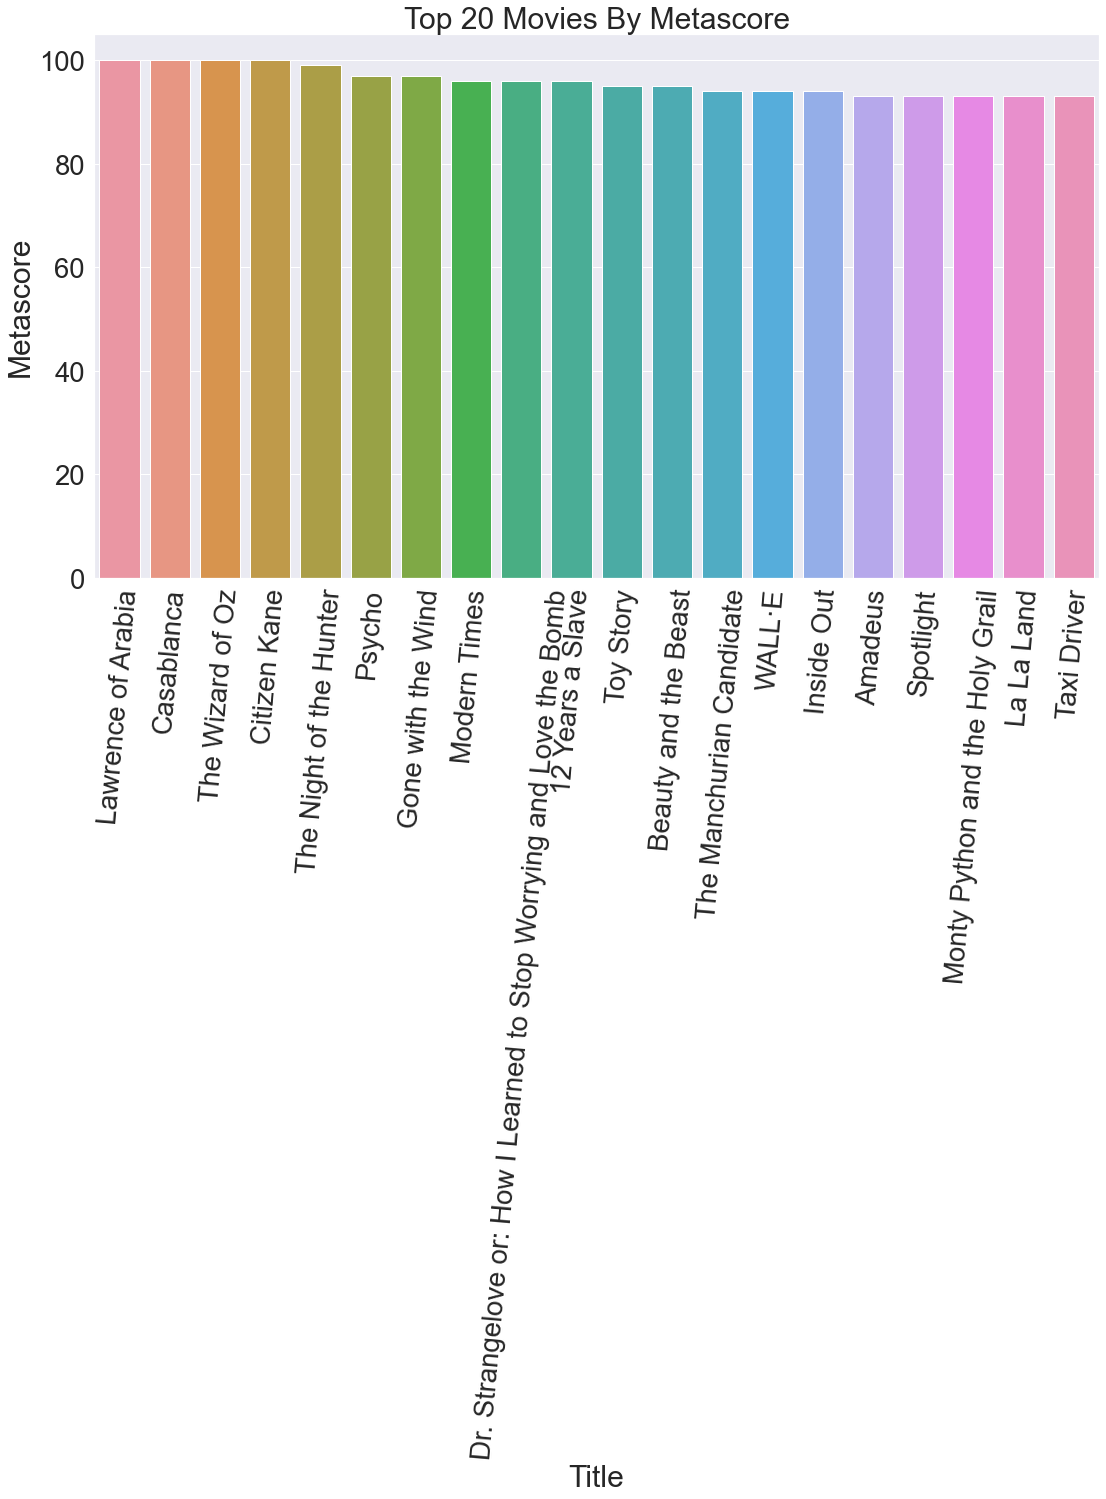

In [77]:
plt.figure(figsize=(18,10))
graph=sns.barplot(y='Metascore',x='Title',data=Top)
graph.set_title('Top 20 Movies By Metascore')
plt.xticks(rotation=85)
plt.show()

In [78]:
# top directors

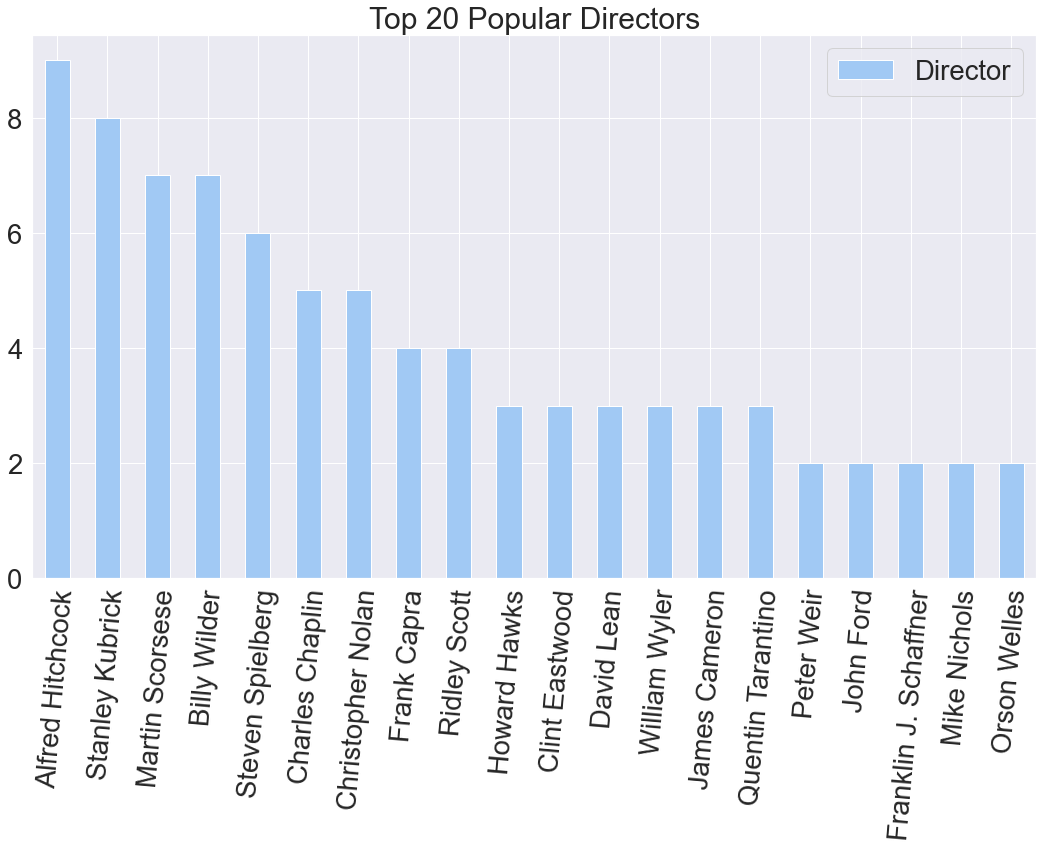

In [79]:
dfDirectors = df2[["Director"]].apply(pd.value_counts)
dfDirectors = dfDirectors.head(20)
dfDirectors.plot(kind="bar", figsize=(18,10))
plt.xticks(rotation = 85)
plt.title("Top 20 Popular Directors")
plt.show()

In [80]:
# Effect on runtime

In [81]:
mRuntym=df2[['Runtime', 'imdbRating']].sort_values(by="Runtime",ascending=False)
mRuntym.head()

,Runtime,imdbRating
118,238,8.2
54,229,8.4
64,216,8.3
146,212,8.1
172,191,8.1


In [82]:
# Line_plot

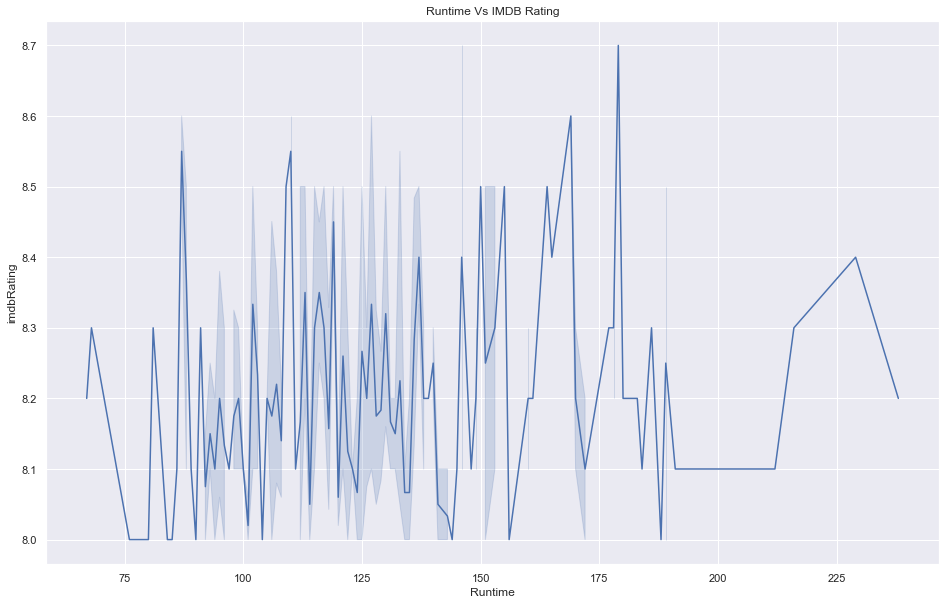

In [83]:
plt.figure(figsize=(16,10))
sns.set_theme(font_scale= 1)
graph=sns.lineplot(x='Runtime',y='imdbRating',data=mRuntym)
graph.set_title('Runtime Vs IMDB Rating')
plt.xticks() 
plt.show()

In [84]:
# Point_plot

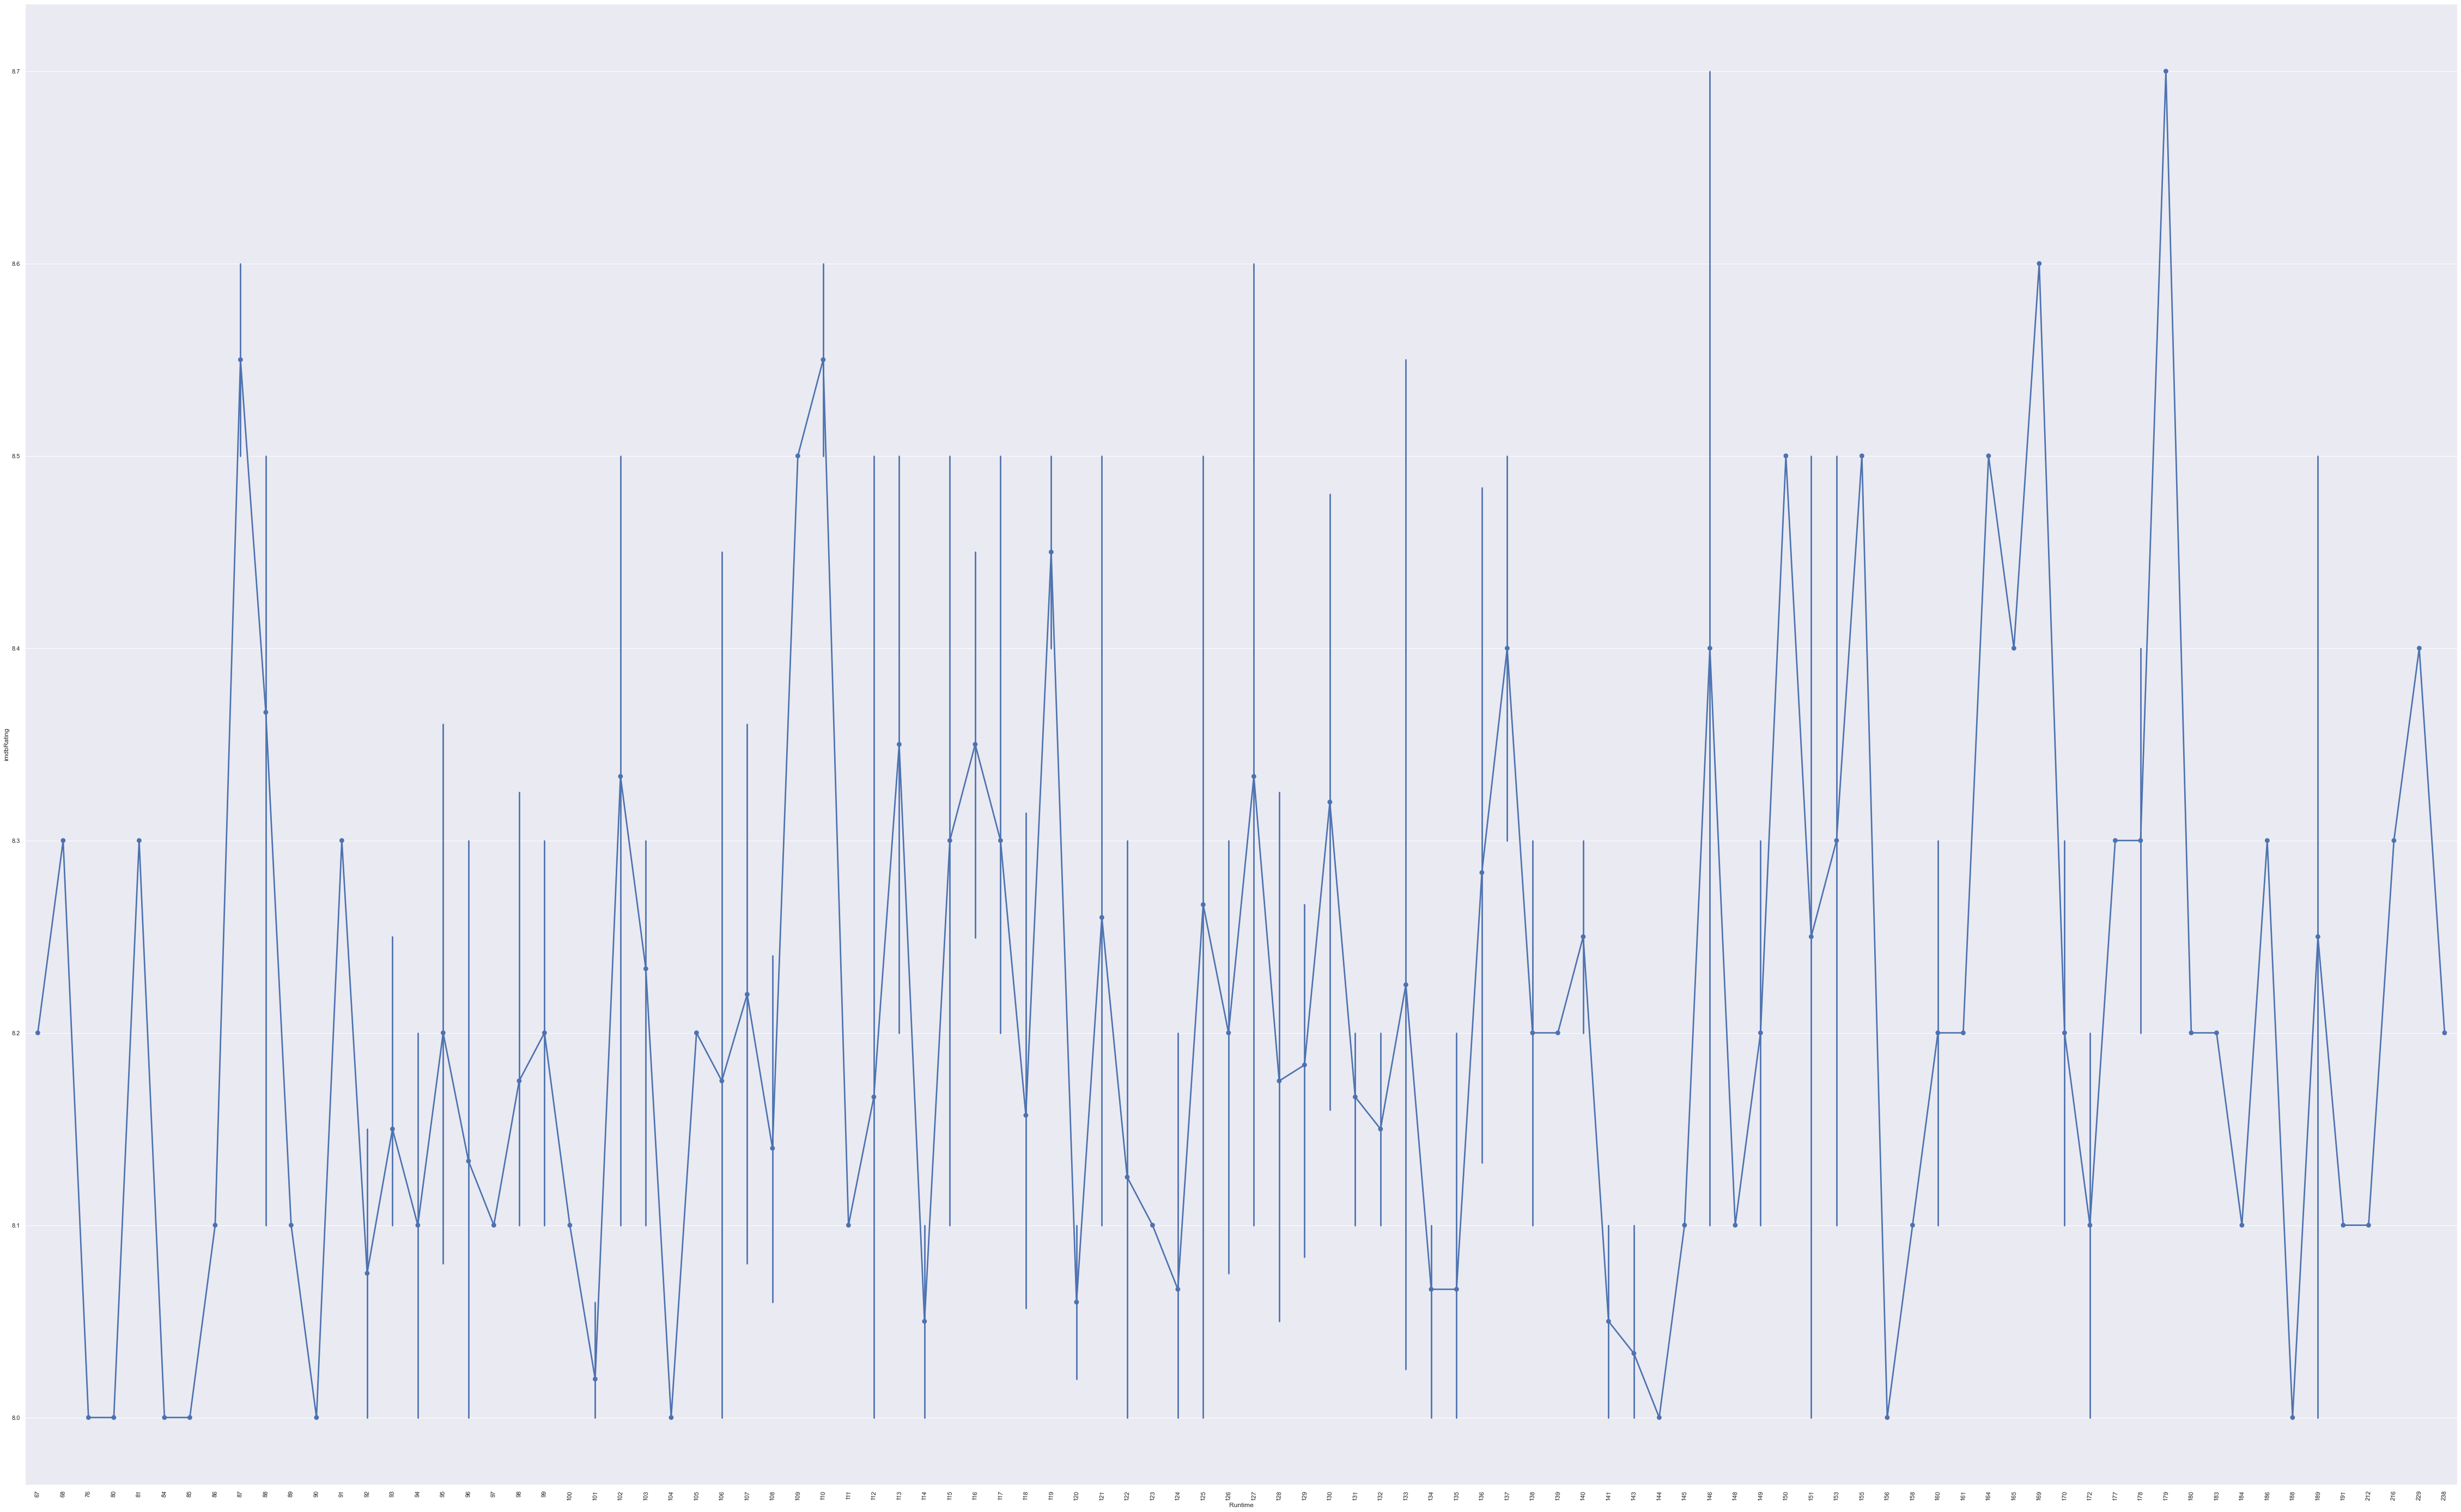

In [85]:
plt.figure(figsize=(80,50))
sns.set_theme(font_scale= 1)
sns.pointplot(y=mRuntym["imdbRating"],x=mRuntym["Runtime"])
plt.xticks(rotation = 85)
plt.show()

In [86]:
# relation b/n imdbrating and boxoffice

In [87]:
mbox=df2[['BoxOffice', 'imdbRating']].sort_values(by="BoxOffice",ascending=False)
mbox.head()

,BoxOffice,imdbRating
39,"$94,240,635",8.5
169,"$936,658,640",8.1
115,"$91,330,760",8.2
238,"$8,616,662",8.0
132,"$74,223,625",8.1


In [88]:
# Line_plot

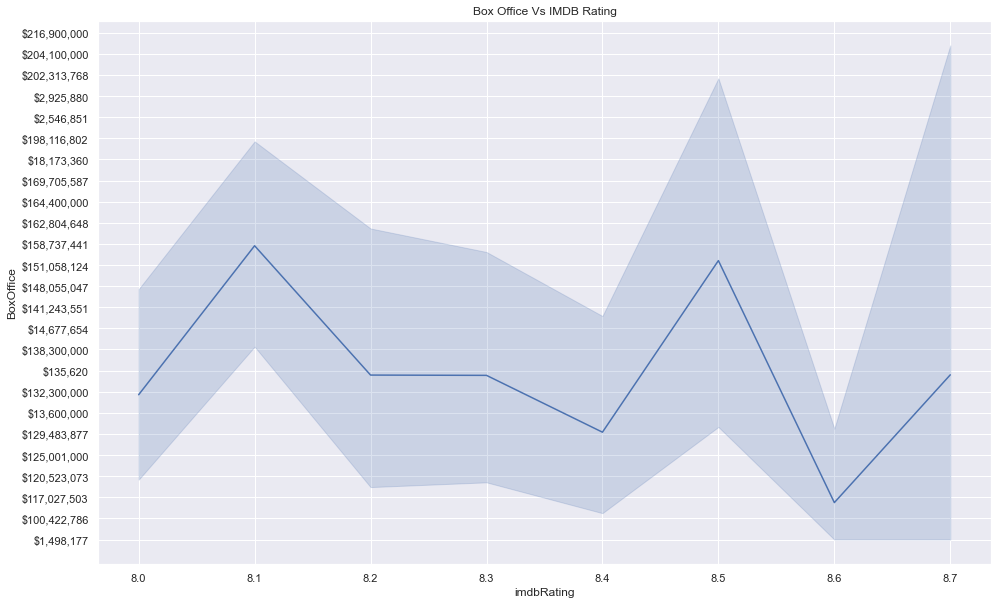

In [89]:
plt.figure(figsize=(16,10))
sns.set_theme(font_scale= 1)
graph=sns.lineplot(y='BoxOffice',x='imdbRating',data=mbox)
graph.set_title('Box Office Vs IMDB Rating')
plt.xticks() 
plt.show()

In [90]:
# Point_plot

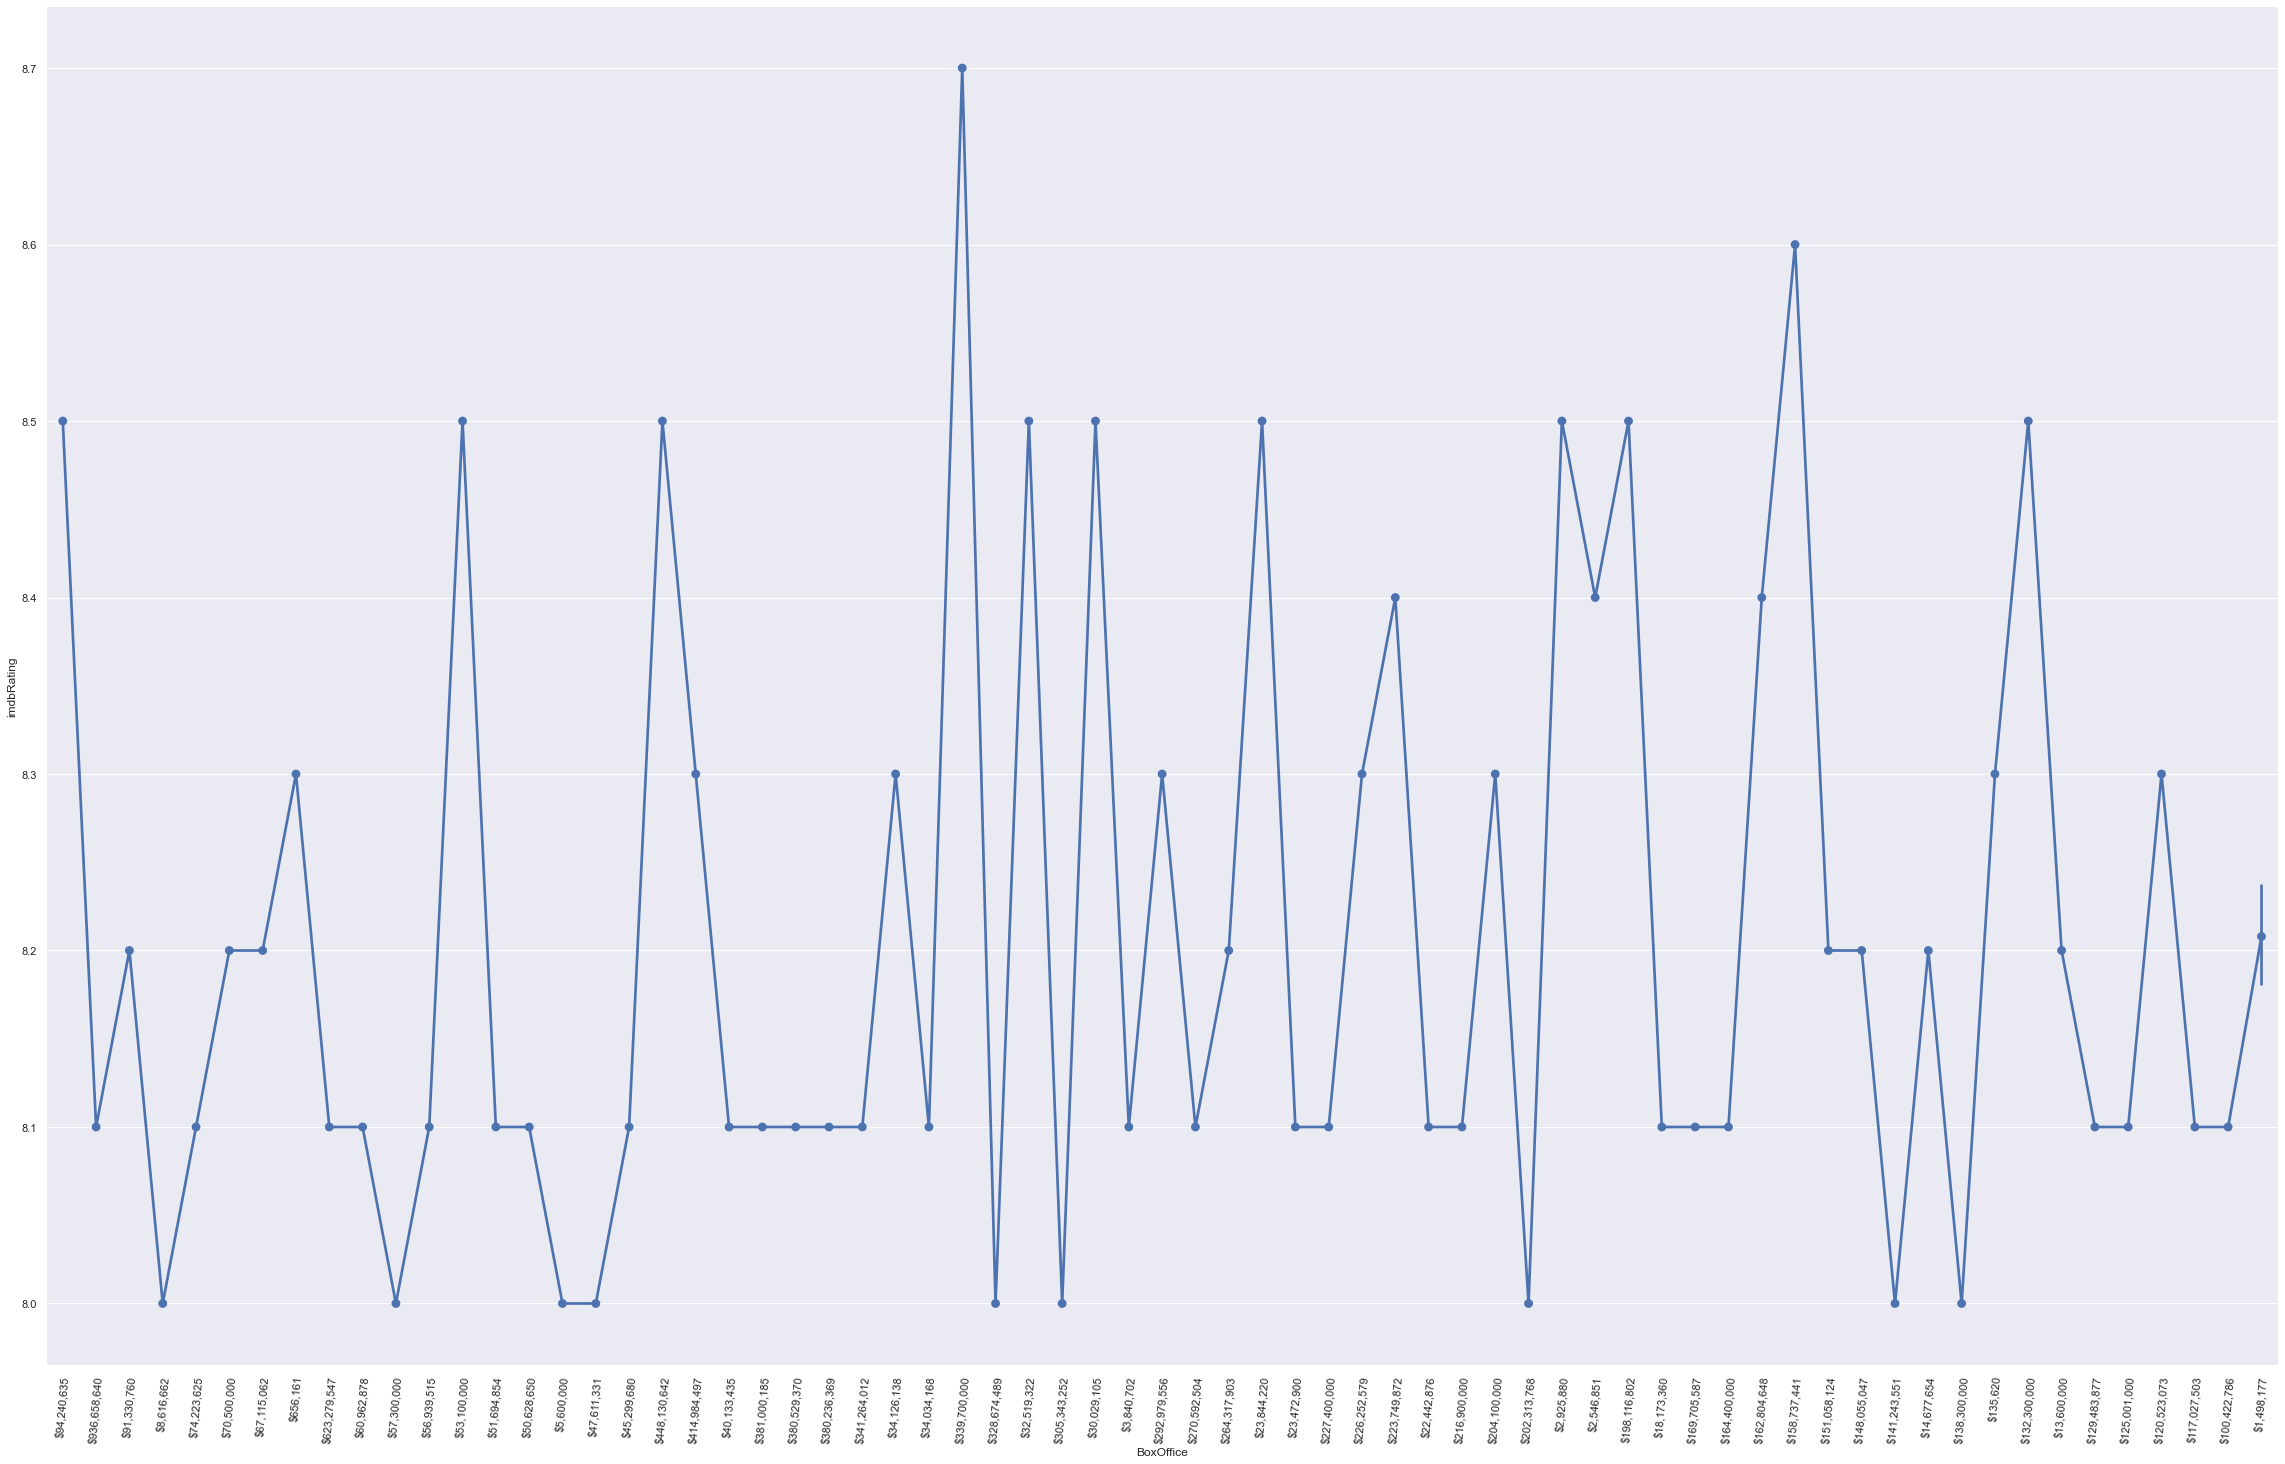

In [91]:
plt.figure(figsize=(40,25))
sns.set_theme(font_scale= 1)
sns.pointplot(y=mbox["imdbRating"],x=mbox["BoxOffice"])
plt.xticks(rotation = 85)
plt.show()

<AxesSubplot:>

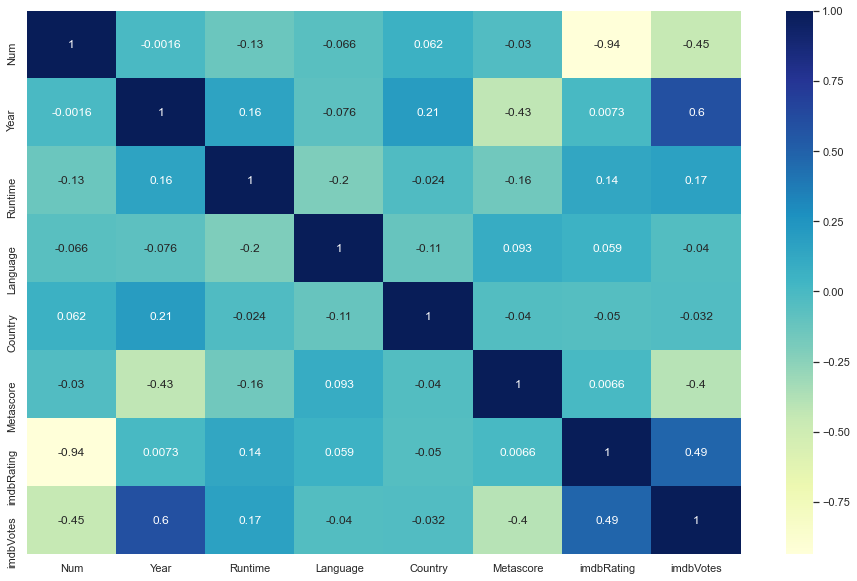

In [92]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr(),cmap="YlGnBu",annot=True)